In [1]:
#pip install geopandas

In [2]:
# standard library
import os
import zipfile
import requests

# data handling
import numpy as np
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical modeling / smoothing
import statsmodels.api as sm

# scikit‑learn preprocessing & dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import Data

In [3]:
feature_0=['Population','clearance_rate',
       'population_density', 'unemployment_rate', 'adjusted_income',
       'poverty_rate', 'rent_burden', 'home_ownership_rate',
       'mobile_home_ratio', 'vacancy_rate', 'Number_of_Persons_per_HseHld',
       'renter_ratio',
       'Median_Age', 'adj_police_budget',
       'adj_education_budget', 'adj_welfare_budget',
        'adj_mental_health_budget', 'adj_rehab_budget','adj_health_budget',
       'adj_judiciary_budget', 'adj_prison_budget',
       'house_affordability', 'uninsured_rate',
       'high_school_rate', 'dropout_rate', 'public_school_rate',
        "social_vs_security", "security_vs_social", 'adherent_rate', 'religion_diversity']

In [4]:
crime_df = pd.read_excel("../processed_data/Features_crime_data_2010-2023.xlsx")
crime_df=crime_df.set_index(['County', 'Year'])
print(crime_df.shape)
crime_df.head()

(602, 34)


crime_rate  Population  clearance_rate  population_density  \
County  Year                                                               
Alameda 2010    0.006931     1510271        0.326901         2046.437669   
        2011    0.007062     1527169        0.294298         2069.334688   
        2012    0.007681     1549193        0.247584         2099.177507   
        2013    0.007453     1575139        0.251895         2134.334688   
        2014    0.006482     1597747        0.297316         2164.968835   

              unemployment_rate  adjusted_income  poverty_rate  rent_burden  \
County  Year                                                                  
Alameda 2010               11.2       294.981910          13.5         42.4   
        2011               10.3       288.906538          13.2         42.3   
        2012                8.8       294.803804          13.1         42.6   
        2013                7.3       298.514628          13.0         42.6   
        2014                5.9       312.921908          12.5         43.0   

              home_ownership_rate  mobile_home_ratio  ...  high_school_rate  \
County  Year                                          ...                     
Alameda 2010             0.551246           0.012387  ...              85.9   
        2011             0.545447           0.012529  ...              86.0   
        2012             0.537406           0.012231  ...              86.2   
        2013             0.531967           0.012731  ...              41.8   
        2014             0.528597           0.012210  ...              86.7   

              dropout_rate  public_school_rate  social_vs_security  \
County  Year                                                         
Alameda 2010         0.028               0.914            2.281002   
        2011         0.030               0.907            2.291757   
        2012         0.025               0.905            2.332472   
        2013         0.021               0.910            2.318133   
        2014         0.020               0.908            2.201498   

              security_vs_social  adherent_rate  religion_diversity  \
County  Year                                                          
Alameda 2010            0.438404       0.337327                   3   
        2011            0.436346       0.345450                   3   
        2012            0.428730       0.352225                   4   
        2013            0.431382       0.357920                   4   
        2014            0.454236       0.364187                   4   

              Category_Rural  Category_Suburban  Category_Urban  
County  Year                                                     
Alameda 2010               0                  0               1  
        2011               0                  0               1  
        2012               0                  0               1  
        2013               0                  0               1  
        2014               0                  0               1  

[5 rows x 34 columns]

In [5]:
crime_df.describe()

crime_rate    Population  clearance_rate  population_density  \
count  602.000000  6.020000e+02      602.000000          602.000000   
mean     0.004258  7.527897e+05        0.515095          422.070372   
std      0.001571  1.577714e+06        0.140504          717.262147   
min      0.000389  1.300800e+04        0.103025            1.826629   
25%      0.003033  6.484925e+04        0.424413           42.107778   
50%      0.004065  2.159820e+05        0.495634          108.700155   
75%      0.005261  7.433602e+05        0.586675          458.248510   
max      0.012728  1.010784e+07        1.000000         3367.593882   

       unemployment_rate  adjusted_income  poverty_rate  rent_burden  \
count         602.000000       602.000000    602.000000   602.000000   
mean            8.313123       239.020218     15.081395    45.210465   
std             4.312680        63.033469      4.904413     5.612012   
min             2.300000       142.086119      6.000000    11.700000   
25%             5.000000       189.769306     11.400000    43.025000   
50%             7.500000       226.380484     14.250000    46.100000   
75%            10.600000       276.357343     18.400000    48.600000   
max            29.400000       451.113721     29.700000    57.800000   

       home_ownership_rate  mobile_home_ratio  ...  high_school_rate  \
count           602.000000         602.000000  ...        602.000000   
mean              0.615981           0.076750  ...         78.799169   
std               0.070237           0.056550  ...         17.740643   
min               0.456931           0.009784  ...         12.600000   
25%               0.568414           0.039395  ...         75.600000   
50%               0.608164           0.061420  ...         84.750000   
75%               0.653538           0.098572  ...         88.800000   
max               0.843661           0.267778  ...         95.300000   

       dropout_rate  public_school_rate  social_vs_security  \
count    602.000000          602.000000          602.000000   
mean       0.026132            0.932314            1.809684   
std        0.015513            0.036881            0.487959   
min        0.000000            0.790000            0.787417   
25%        0.017000            0.913000            1.460026   
50%        0.024000            0.936500            1.784622   
75%        0.032000            0.957000            2.157423   
max        0.096914            1.000000            3.633335   

       security_vs_social  adherent_rate  religion_diversity  Category_Rural  \
count          602.000000     602.000000          602.000000      602.000000   
mean             0.596227       0.398650            2.127907        0.415282   
std              0.172958       0.116883            0.837109        0.493180   
min              0.275229       0.131826            1.000000        0.000000   
25%              0.463516       0.322848            1.000000        0.000000   
50%              0.560344       0.392752            2.000000        0.000000   
75%              0.684919       0.469751            3.000000        1.000000   
max              1.269976       0.861072            4.000000        1.000000   

       Category_Suburban  Category_Urban  
count         602.000000      602.000000  
mean            0.338870        0.245847  
std             0.473719        0.430946  
min             0.000000        0.000000  
25%             0.000000        0.000000  
50%             0.000000        0.000000  
75%             1.000000        0.000000  
max             1.000000        1.000000  

[8 rows x 34 columns]

# Distribution of crime rate

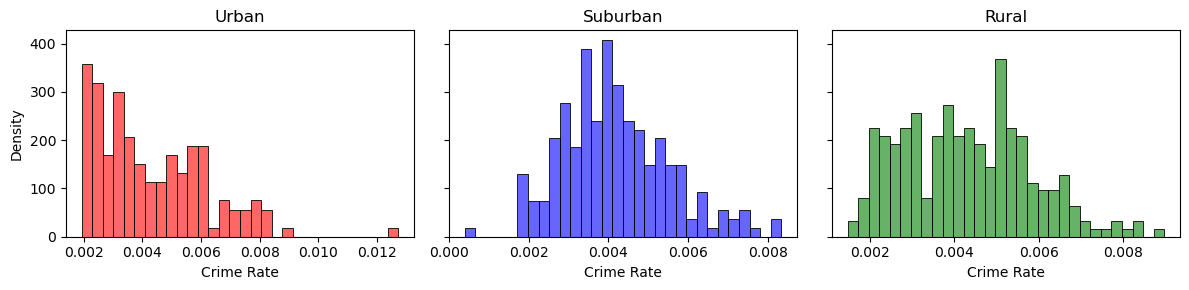

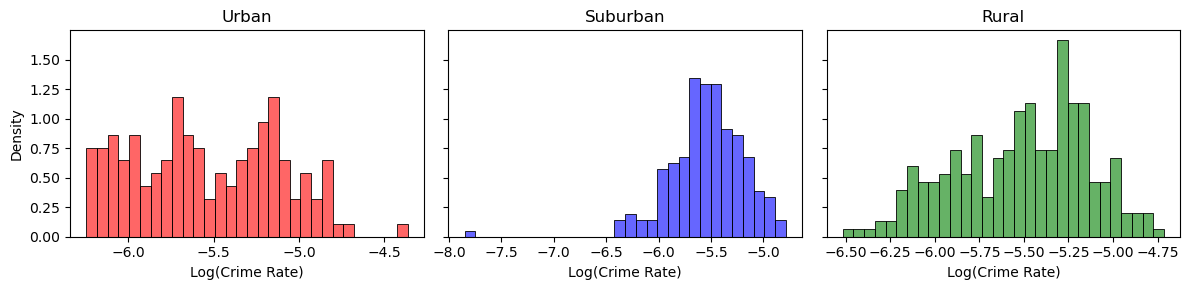

In [6]:
crime_df['log_crime_rate'] = np.log(crime_df['crime_rate'])

# Mapping of category labels to their DataFrame columns and colors
cat_map   = {'Urban':    'Category_Urban',
             'Suburban': 'Category_Suburban',
             'Rural':    'Category_Rural'}
color_map = {'Urban': 'red', 'Suburban': 'blue', 'Rural': 'green'}

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, (label, col) in zip(axes, cat_map.items()):
    sns.histplot(
        crime_df.loc[crime_df[col] == 1, 'crime_rate'],
        bins=30,
        stat='density',
        color=color_map[label],
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f"{label}")
    ax.set_xlabel("Crime Rate")
    if ax is axes[0]:
        ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, (label, col) in zip(axes, cat_map.items()):
    sns.histplot(
        crime_df.loc[crime_df[col] == 1, 'log_crime_rate'],
        bins=30,
        stat='density',
        color=color_map[label],
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f"{label}")
    ax.set_xlabel("Log(Crime Rate)")
    if ax is axes[0]:
        ax.set_ylabel("Density")
plt.tight_layout()
plt.show()


# Distribution of each feature

Density plots

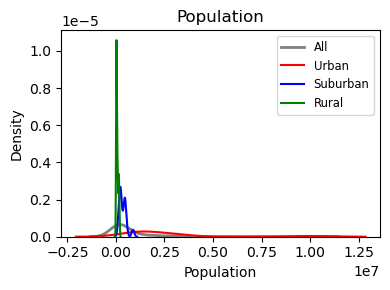

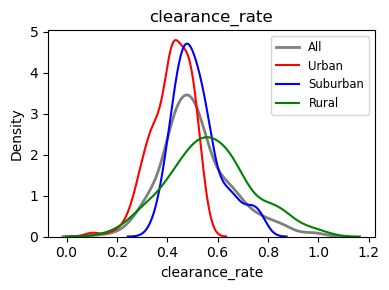

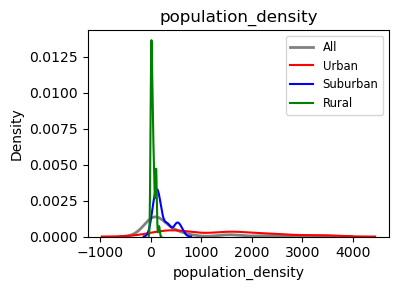

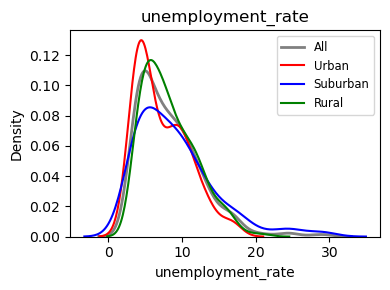

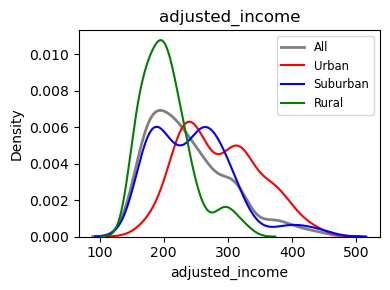

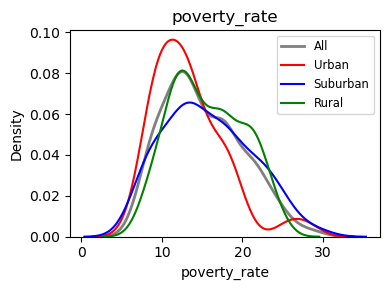

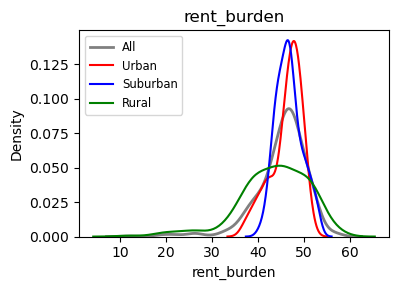

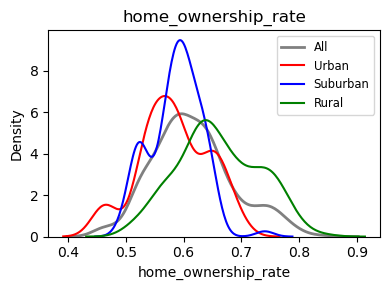

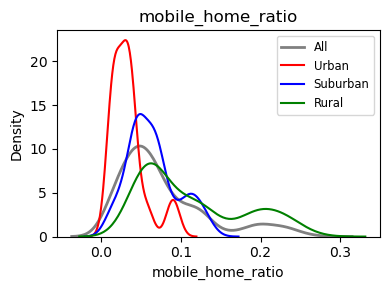

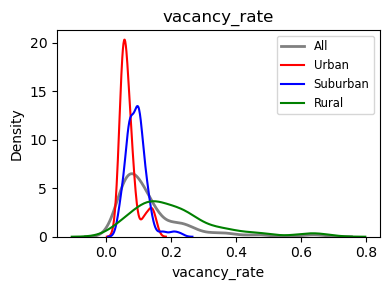

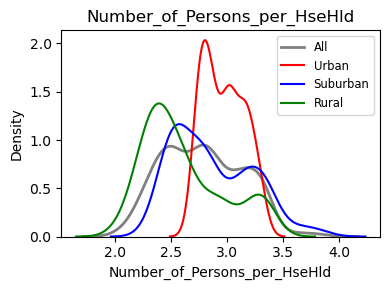

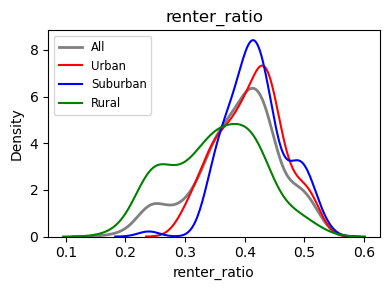

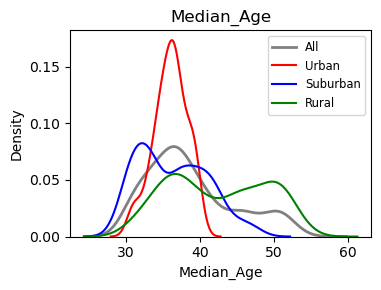

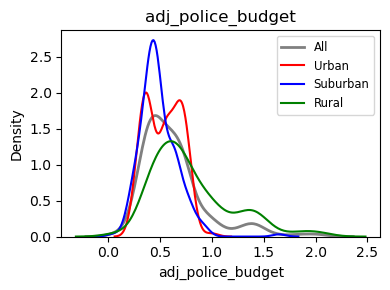

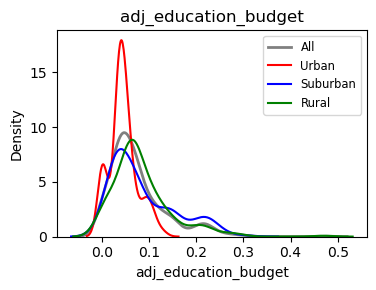

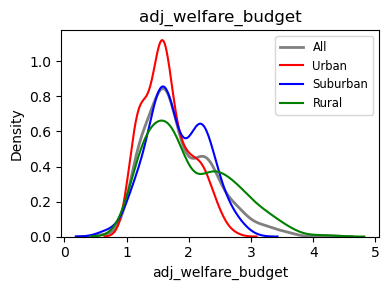

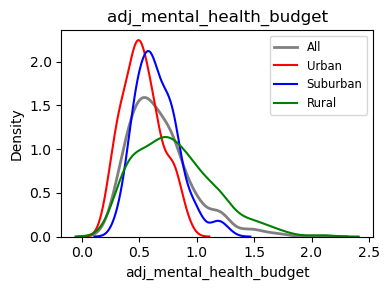

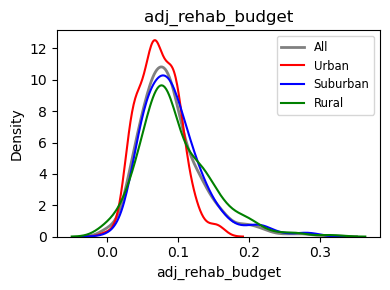

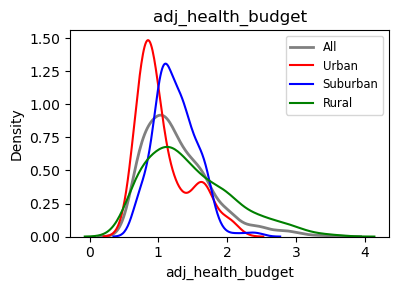

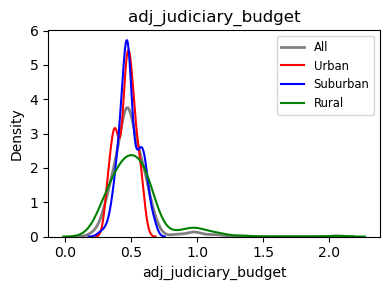

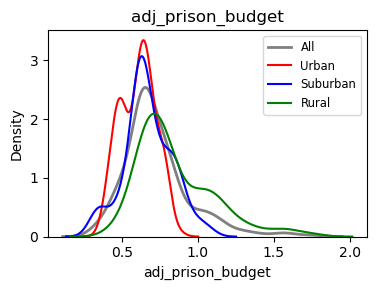

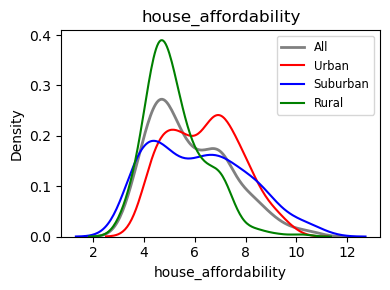

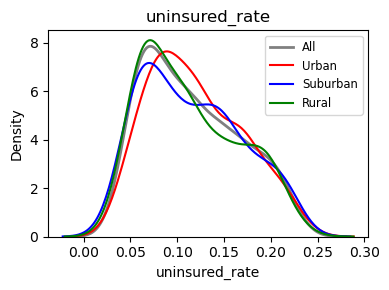

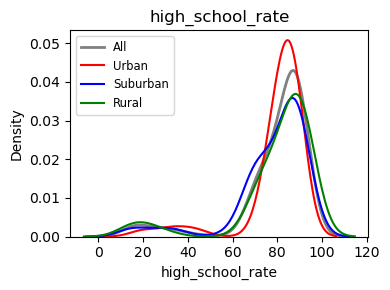

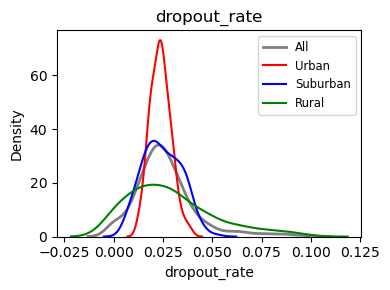

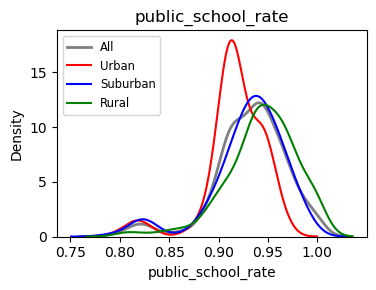

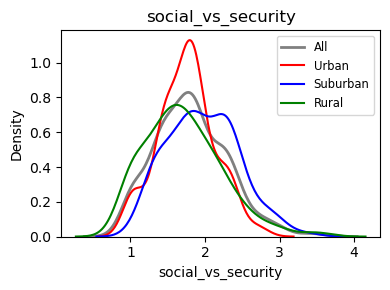

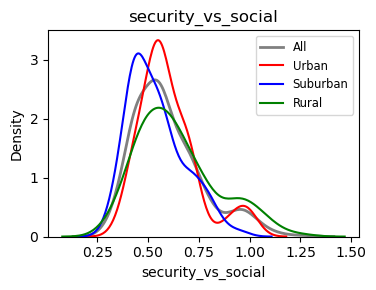

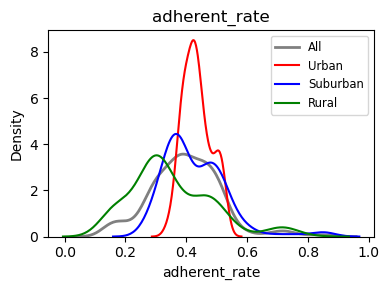

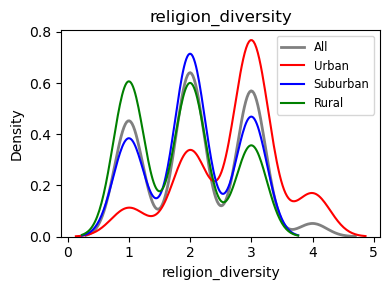

In [7]:
plot_df = crime_df.reset_index()
plot_df['County_Type'] = np.select(
    [
        plot_df['Category_Urban']   == 1,
        plot_df['Category_Suburban']== 1,
        plot_df['Category_Rural']   == 1
    ],
    ['Urban', 'Suburban', 'Rural'],
    default='Unknown'
)

feature_cols = feature_0

color_map = {'All': 'gray', 'Urban': 'red', 'Suburban': 'blue', 'Rural': 'green'}

for feat in feature_cols:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(plot_df[feat], label='All', color=color_map['All'], lw=2)
    sns.kdeplot(plot_df.query("County_Type=='Urban'")[feat],
                label='Urban', color=color_map['Urban'])
    sns.kdeplot(plot_df.query("County_Type=='Suburban'")[feat],
                label='Suburban', color=color_map['Suburban'])
    sns.kdeplot(plot_df.query("County_Type=='Rural'")[feat],
                label='Rural', color=color_map['Rural'])
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(fontsize='small')
    plt.tight_layout()
    plt.show()


Box plots

C:\Users\deepe\AppData\Local\Temp\ipykernel_57868\134971984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


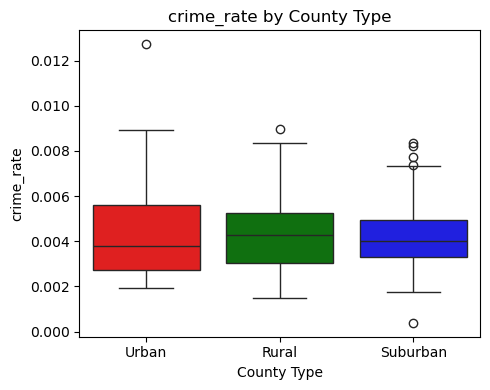

C:\Users\deepe\AppData\Local\Temp\ipykernel_57868\134971984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


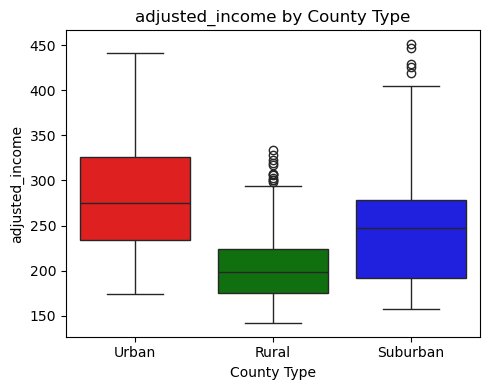

C:\Users\deepe\AppData\Local\Temp\ipykernel_57868\134971984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


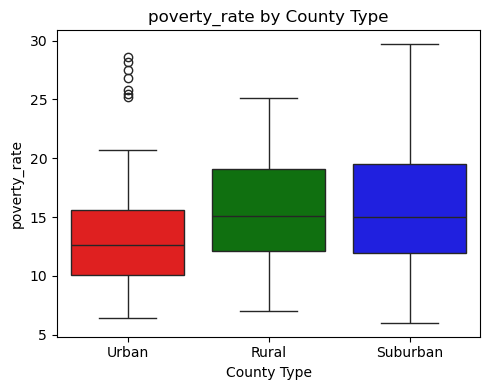

C:\Users\deepe\AppData\Local\Temp\ipykernel_57868\134971984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


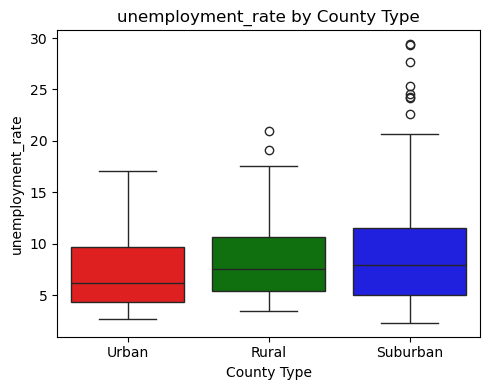

In [8]:
key_features = ['crime_rate', 'adjusted_income', 'poverty_rate', 'unemployment_rate']
for feat in key_features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(
        x='County_Type',
        y=feat,
        data=plot_df,
        palette={'Urban': 'red', 'Suburban': 'blue', 'Rural': 'green'}
    )
    plt.title(f'{feat} by County Type')
    plt.xlabel('County Type')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()

# Correlations

Correlations between features

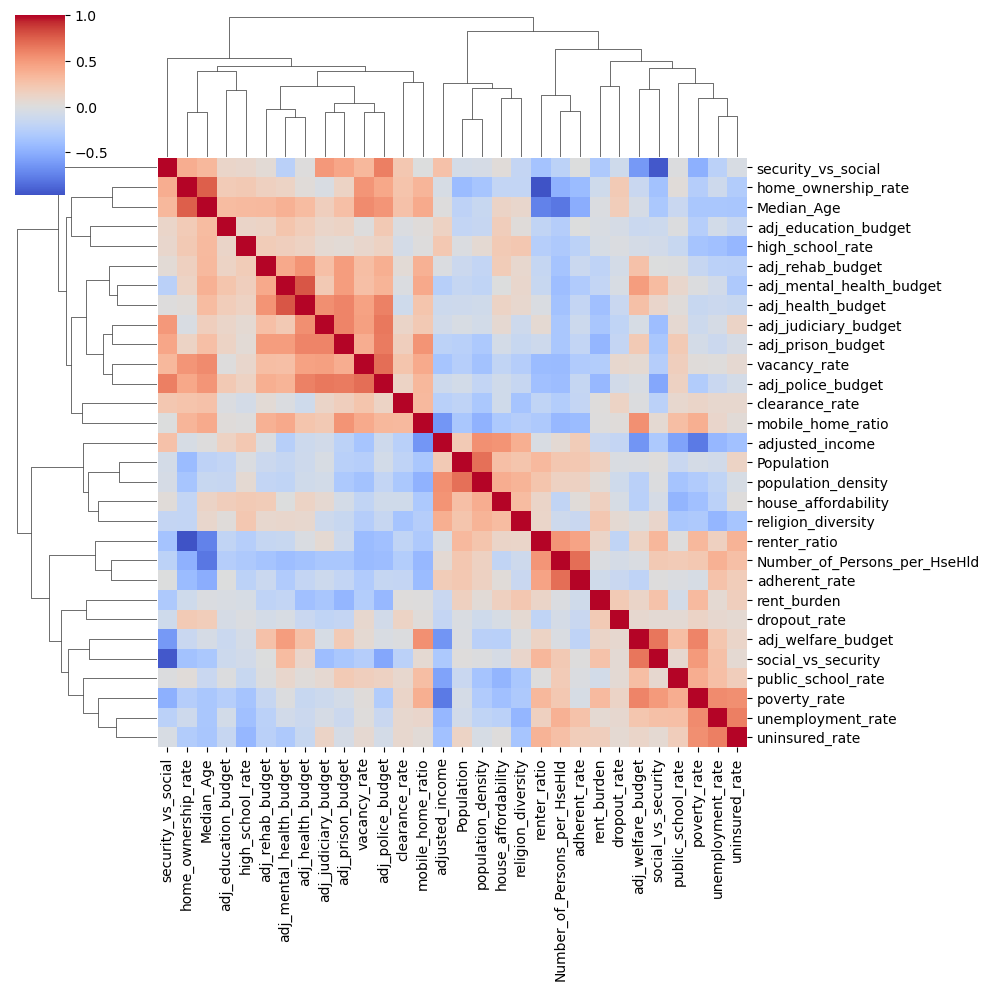

In [9]:
corr = crime_df[feature_0].corr()
sns.clustermap(corr, cmap='coolwarm', center=0)


Correlation of each feature with crime_rate

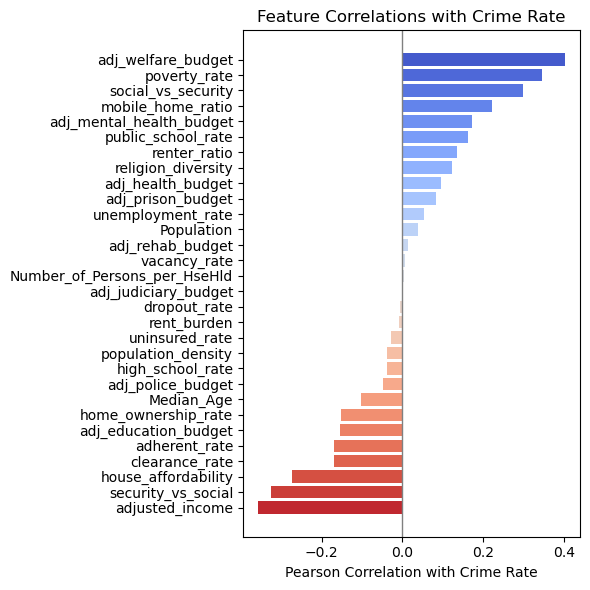

In [10]:
feature_corr = crime_df[feature_0].corrwith(crime_df['crime_rate'])
feature_corr_sorted = feature_corr.sort_values(ascending=False)

plt.figure(figsize=(6, 6))
colors = sns.color_palette("coolwarm", len(feature_corr_sorted))

plt.barh(
    y=feature_corr_sorted.index,
    width=feature_corr_sorted.values,
    color=colors
)

plt.axvline(0, color='gray', linewidth=1)          # vertical line at zero
plt.xlabel("Pearson Correlation with Crime Rate")  
plt.title("Feature Correlations with Crime Rate")  
plt.gca().invert_yaxis()                           # highest correlations on top
plt.tight_layout()
plt.show()


# Scatter plots of feature vs crime-rate

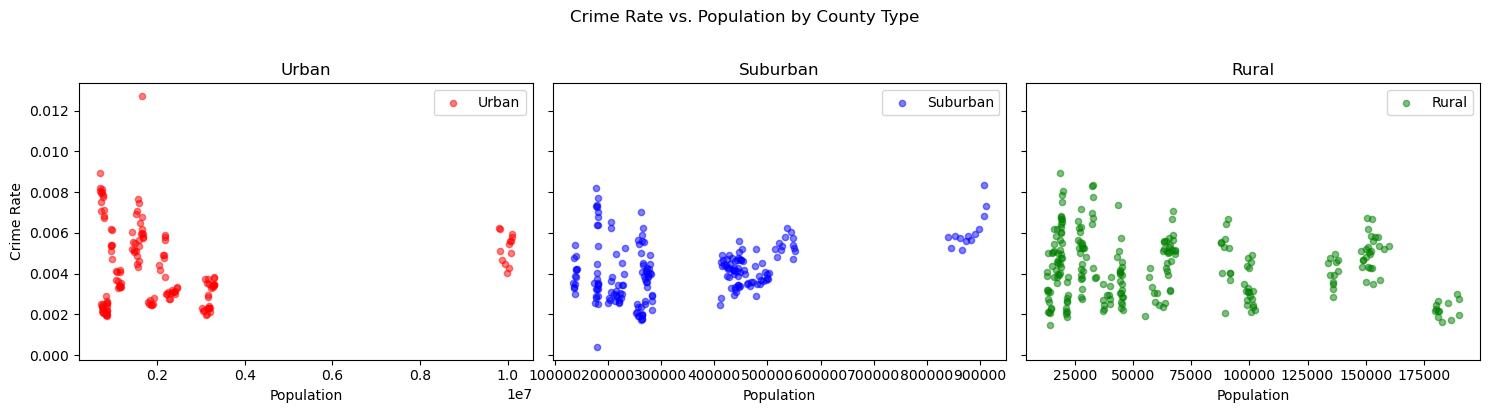

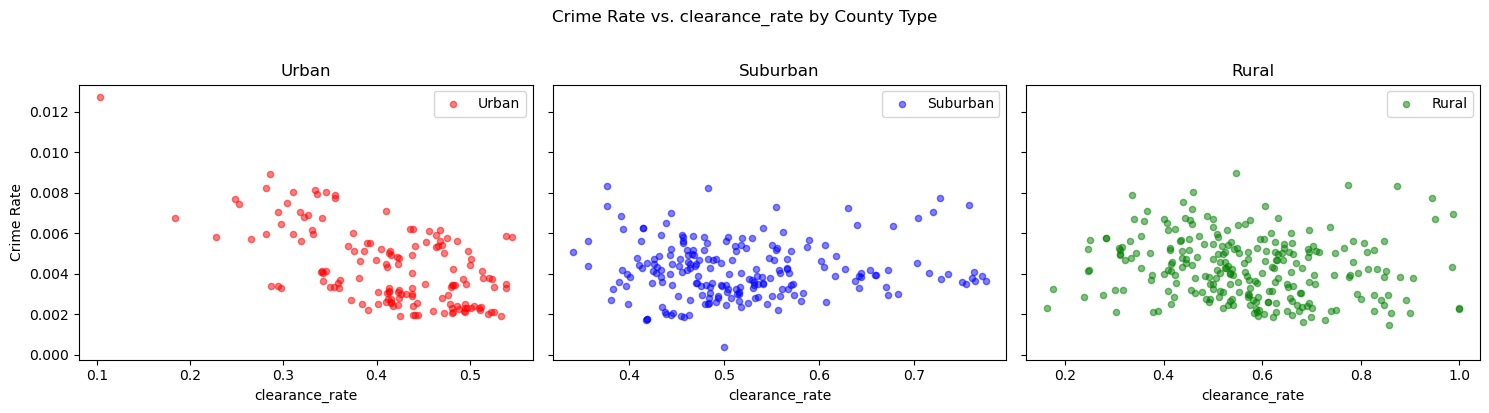

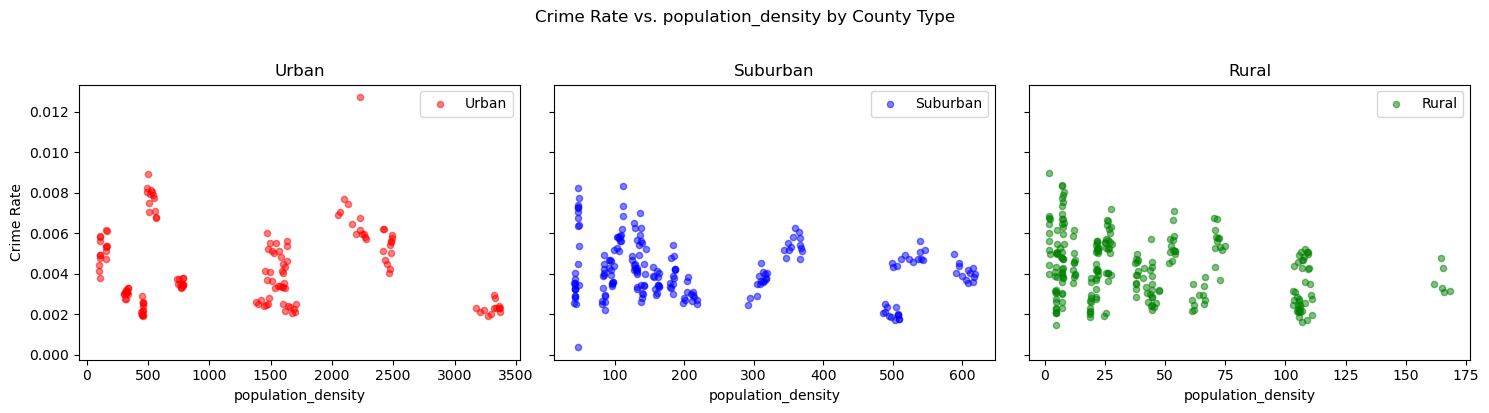

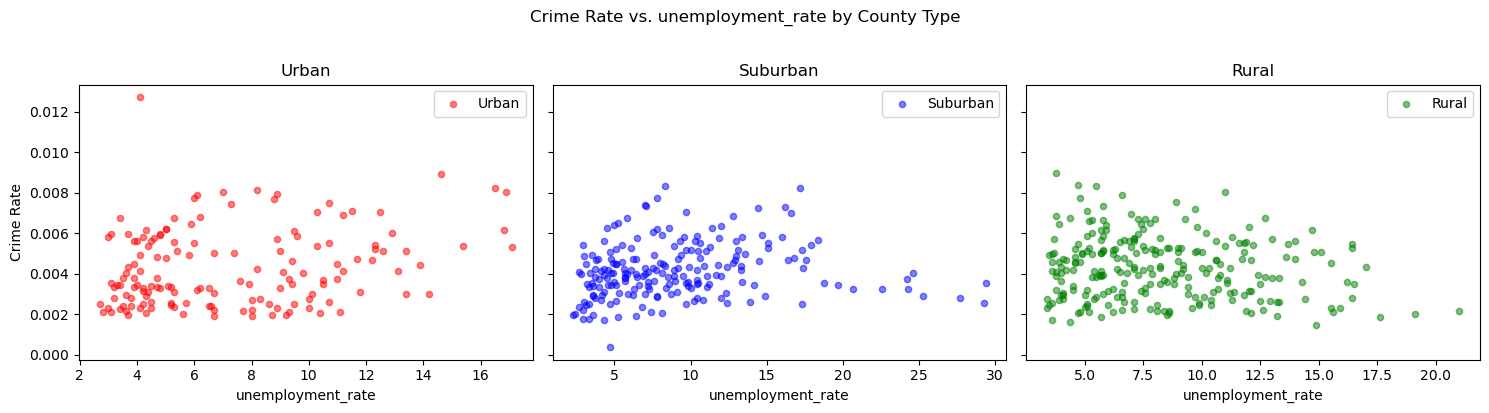

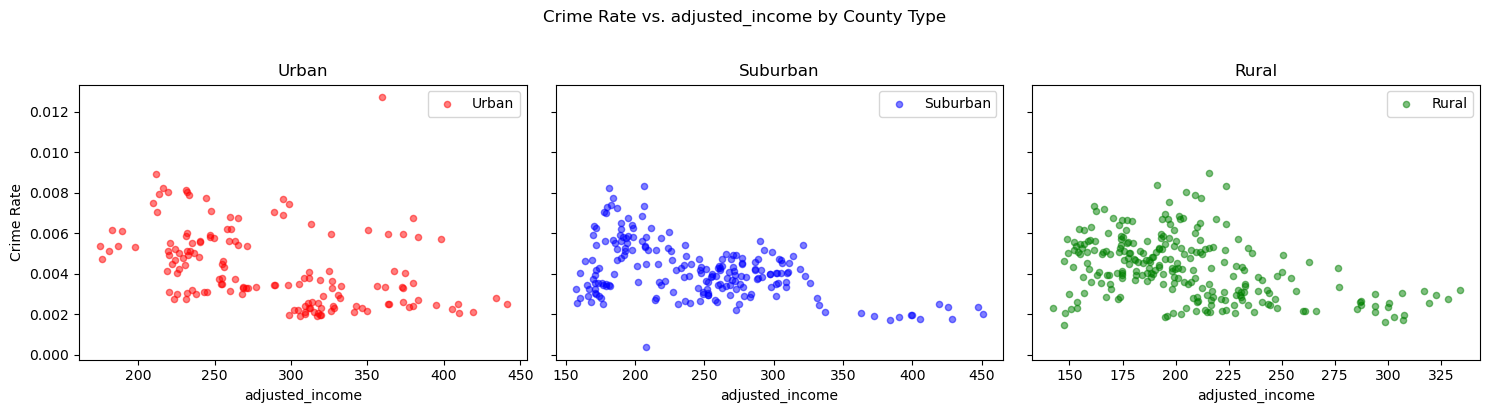

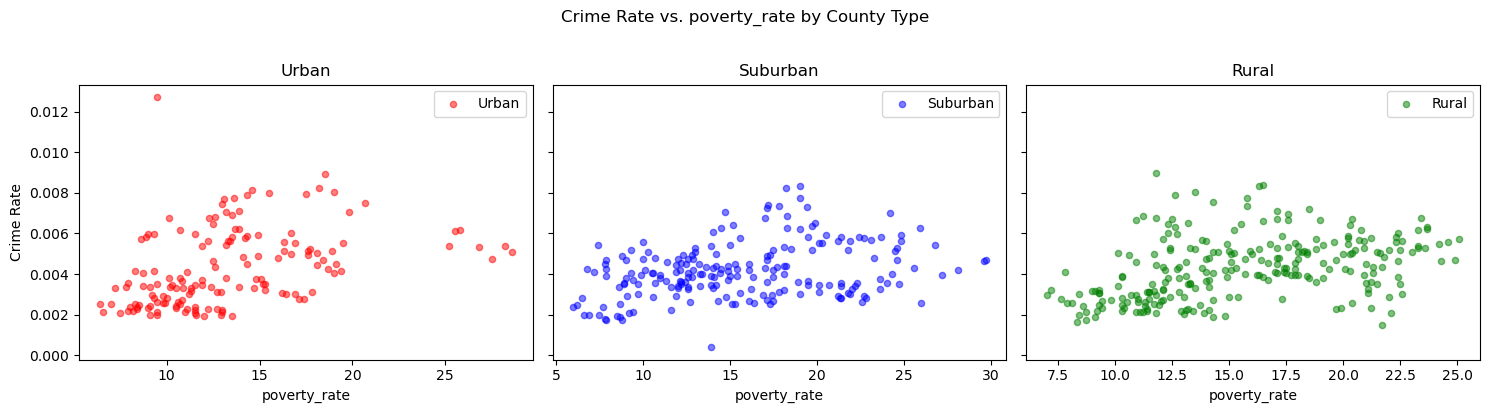

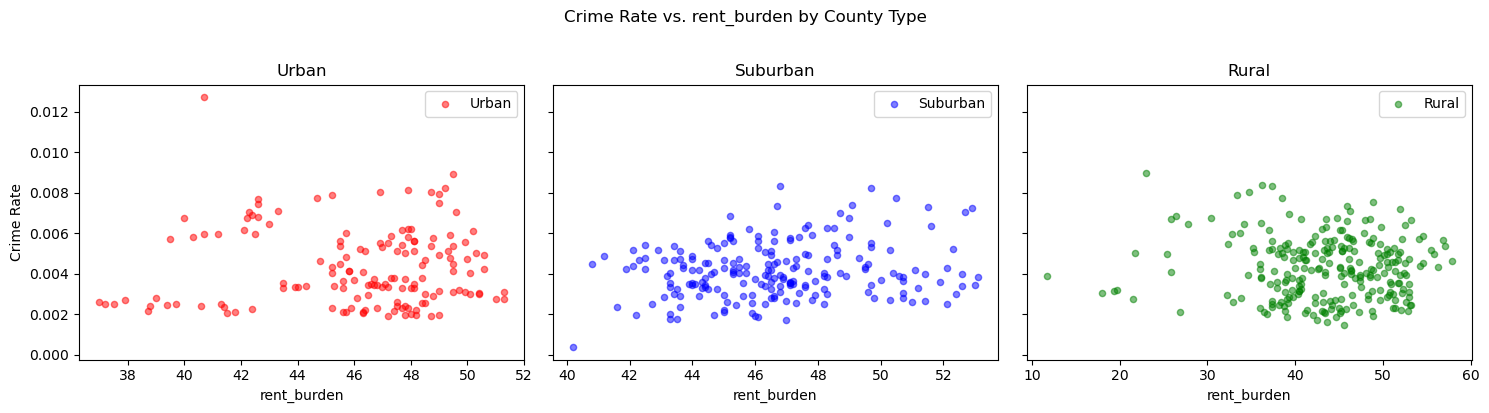

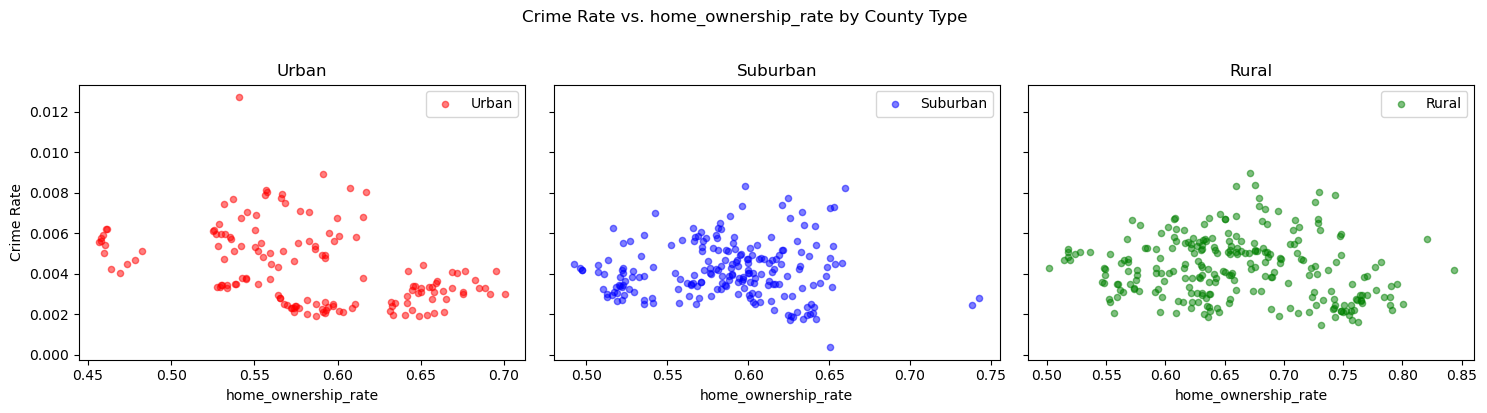

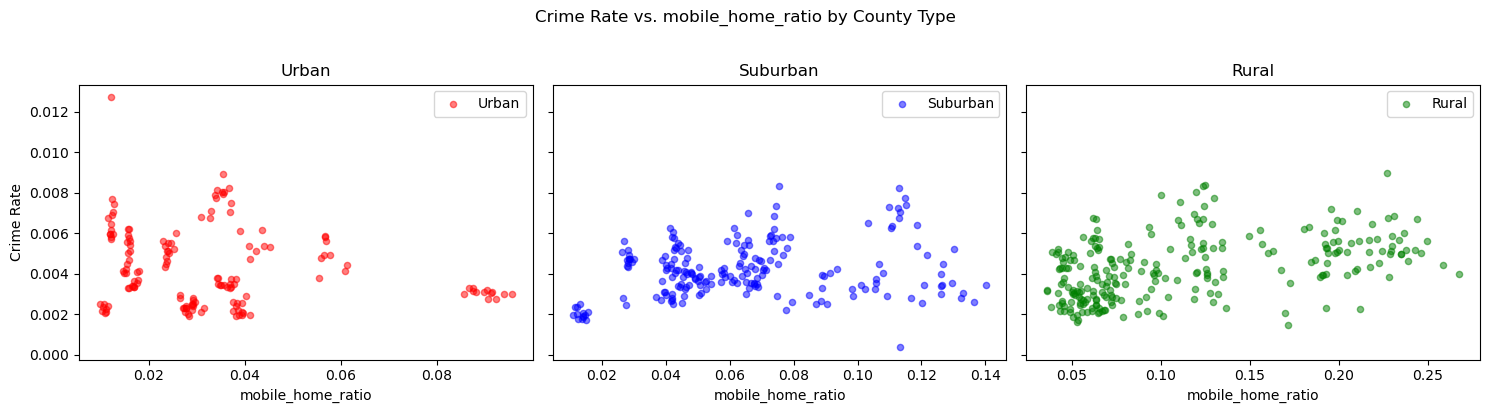

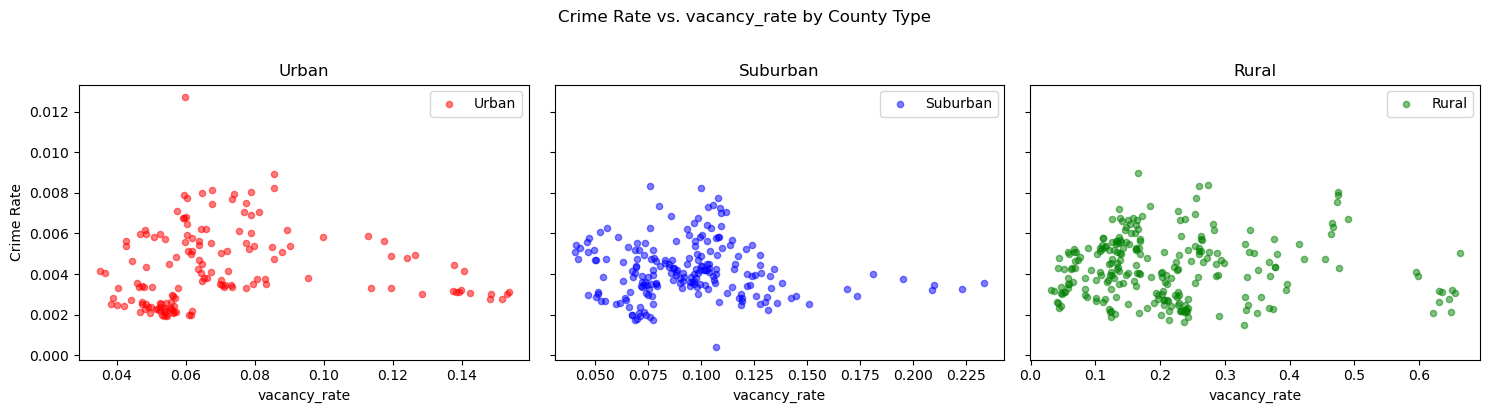

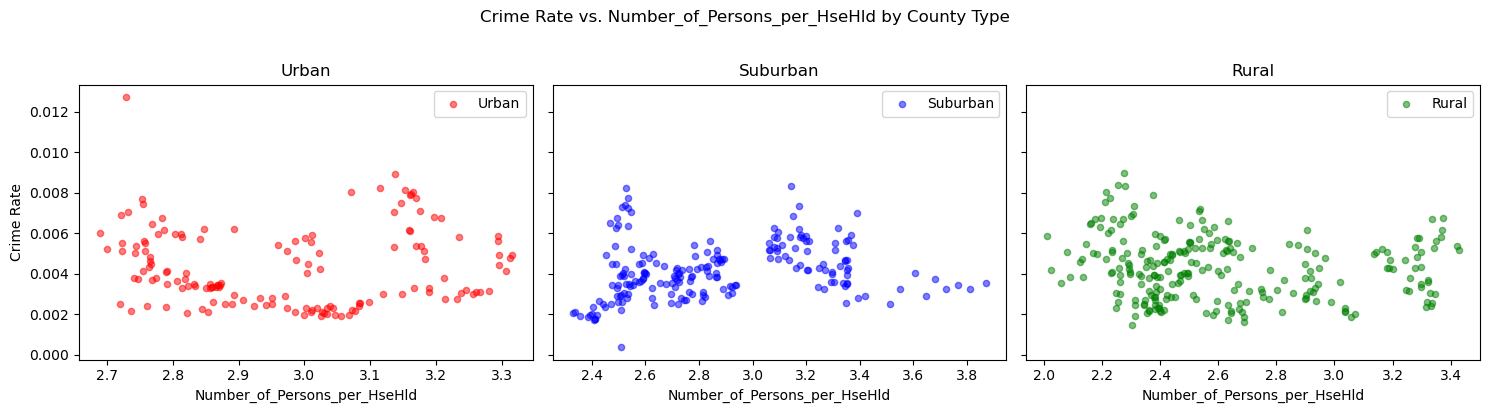

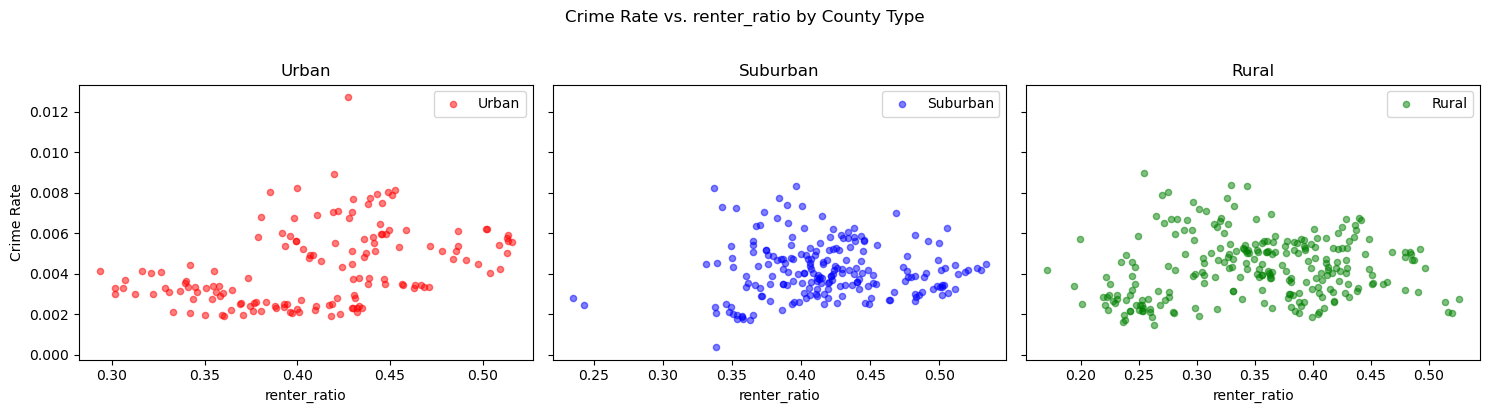

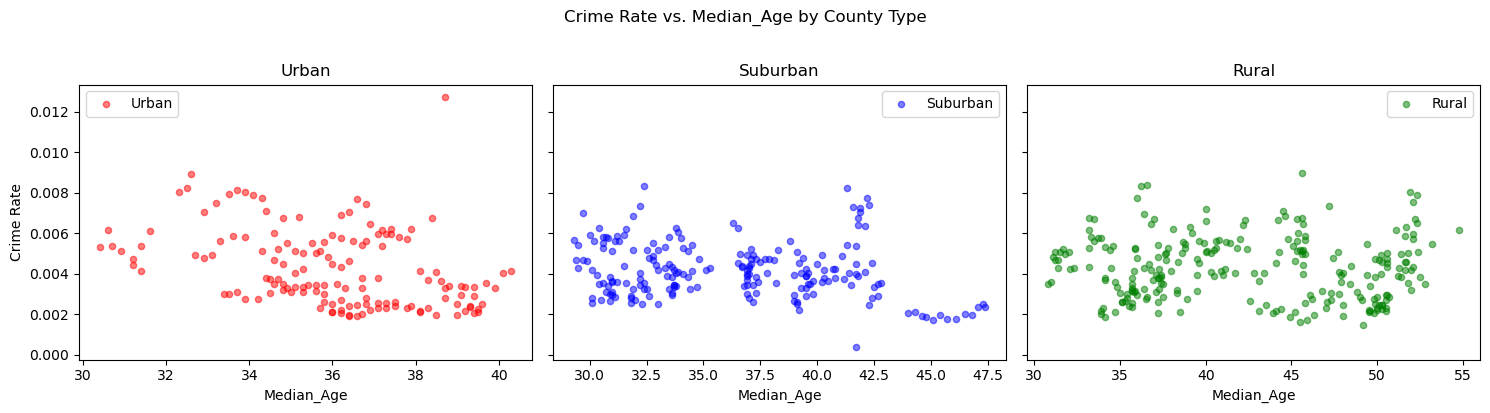

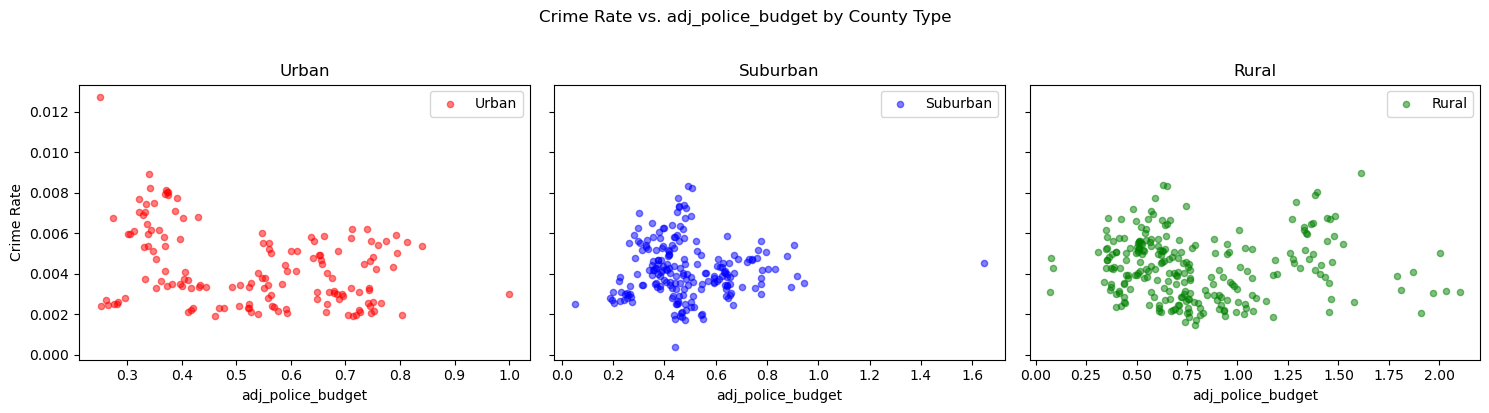

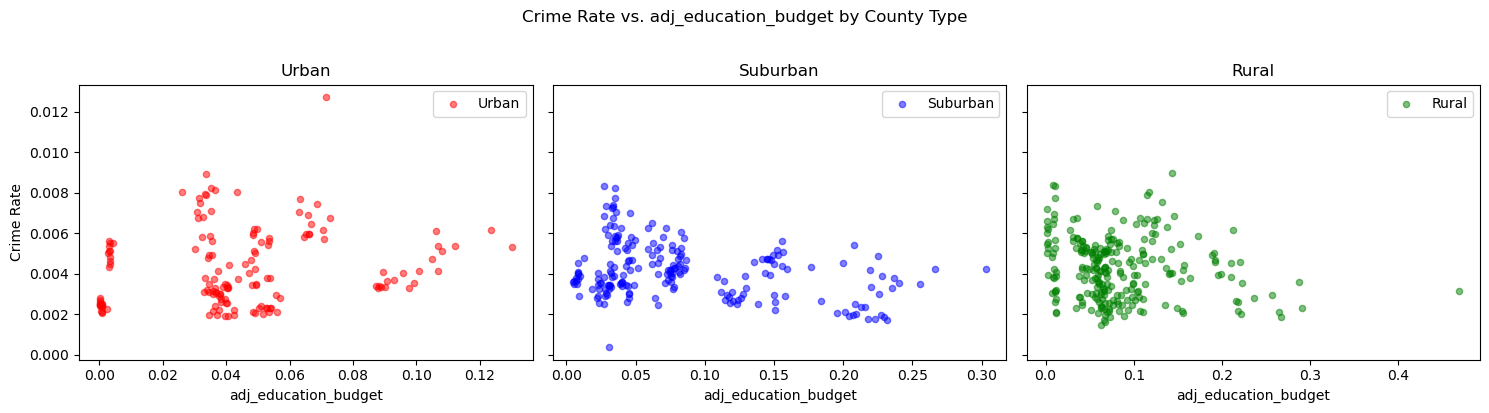

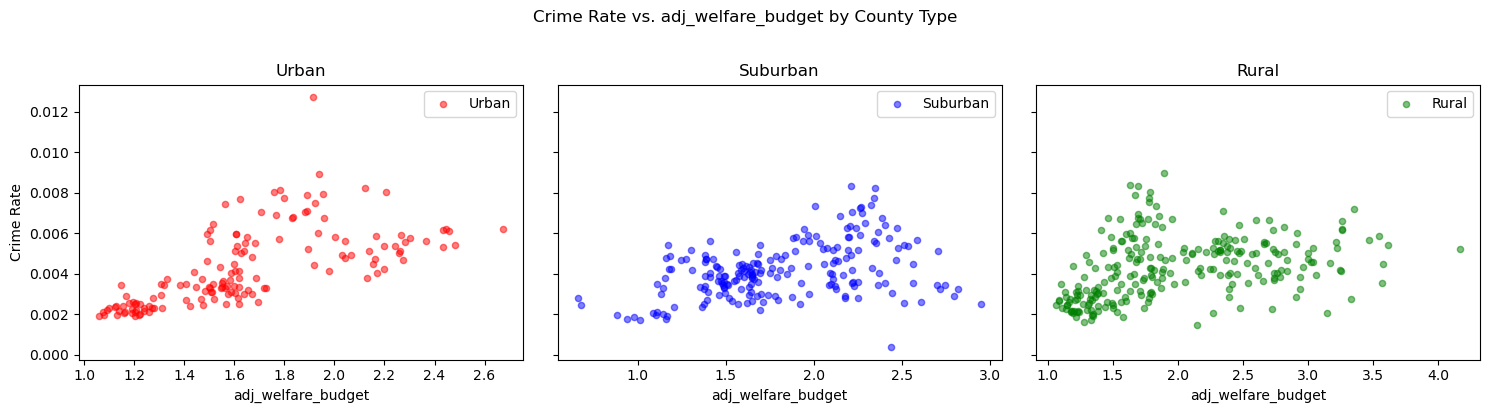

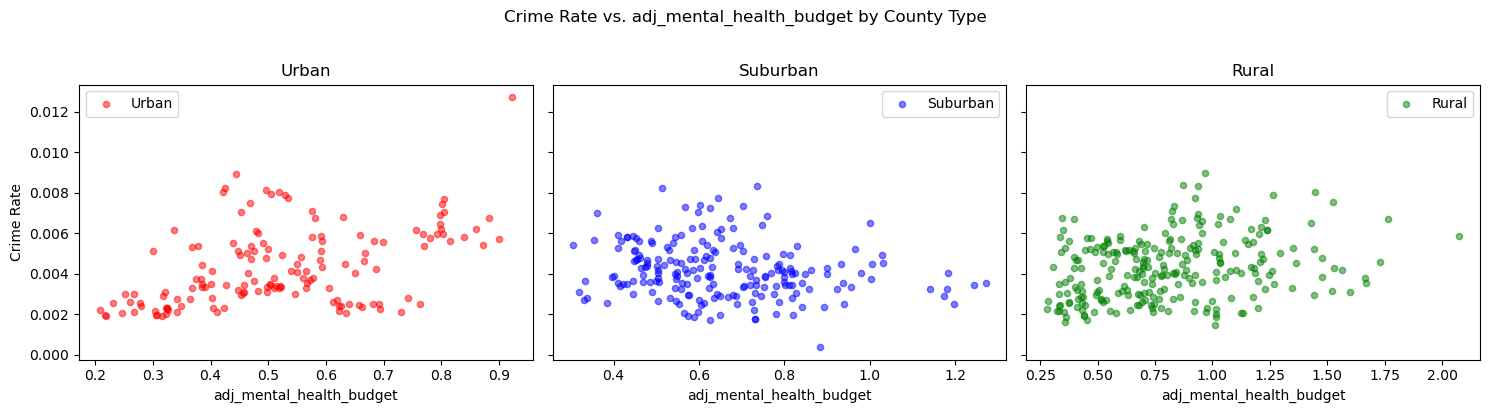

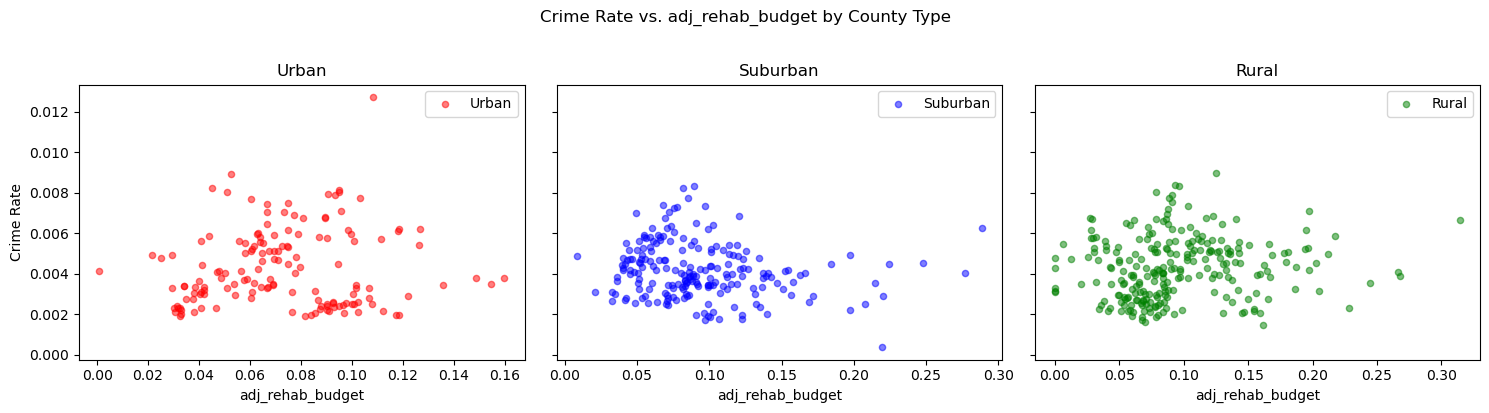

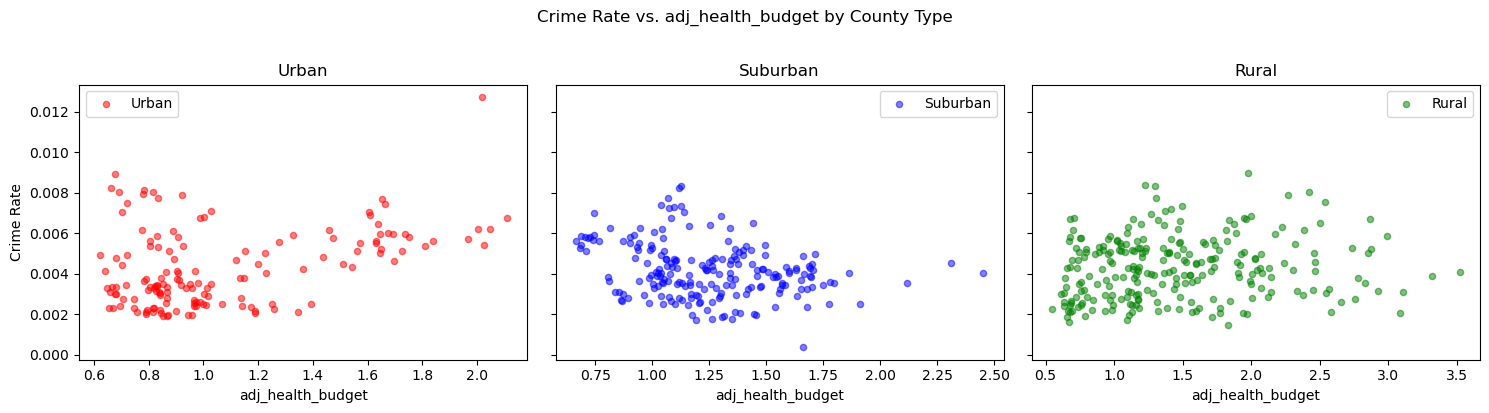

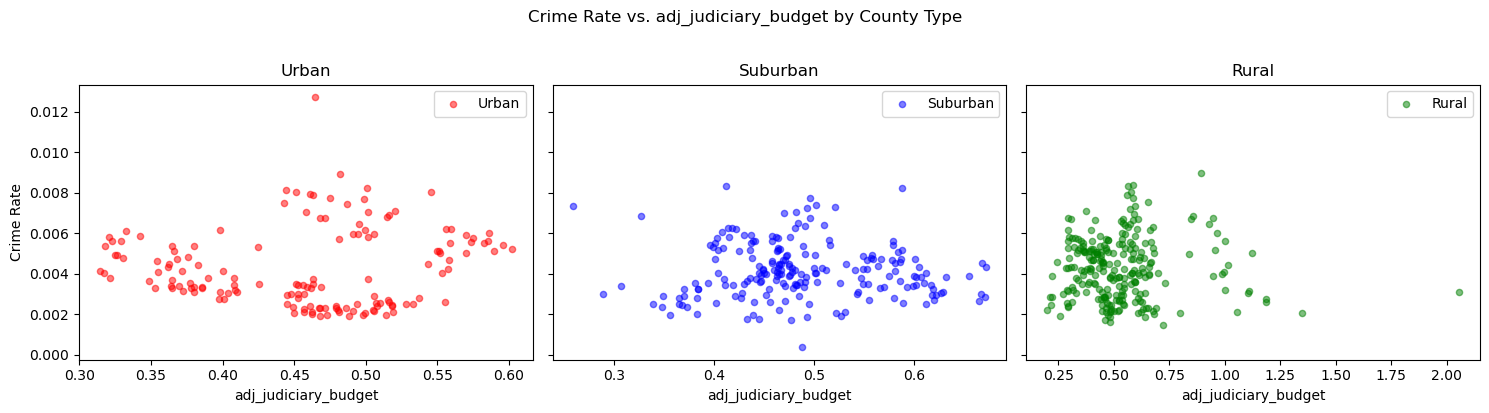

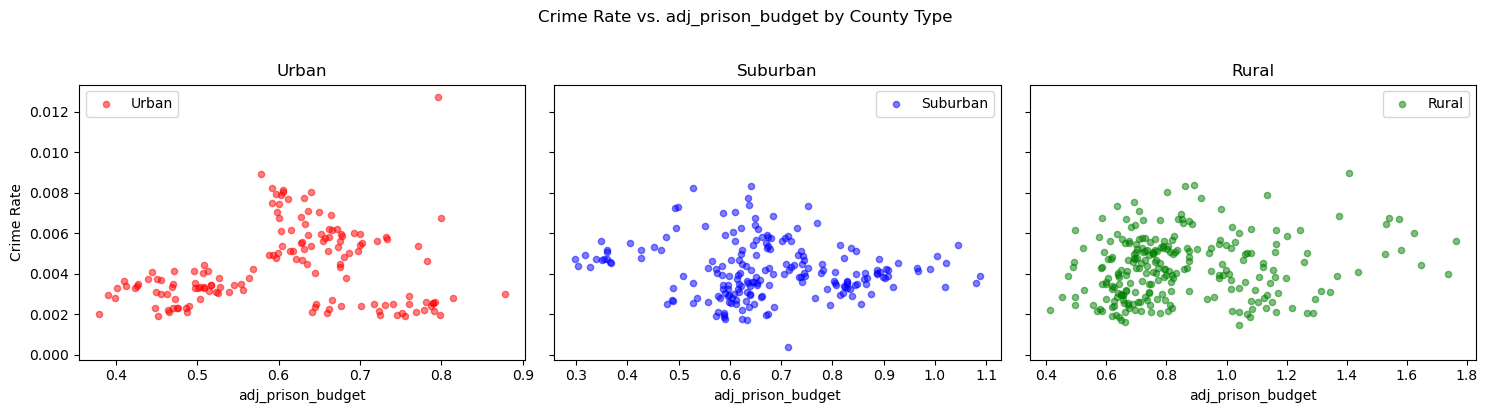

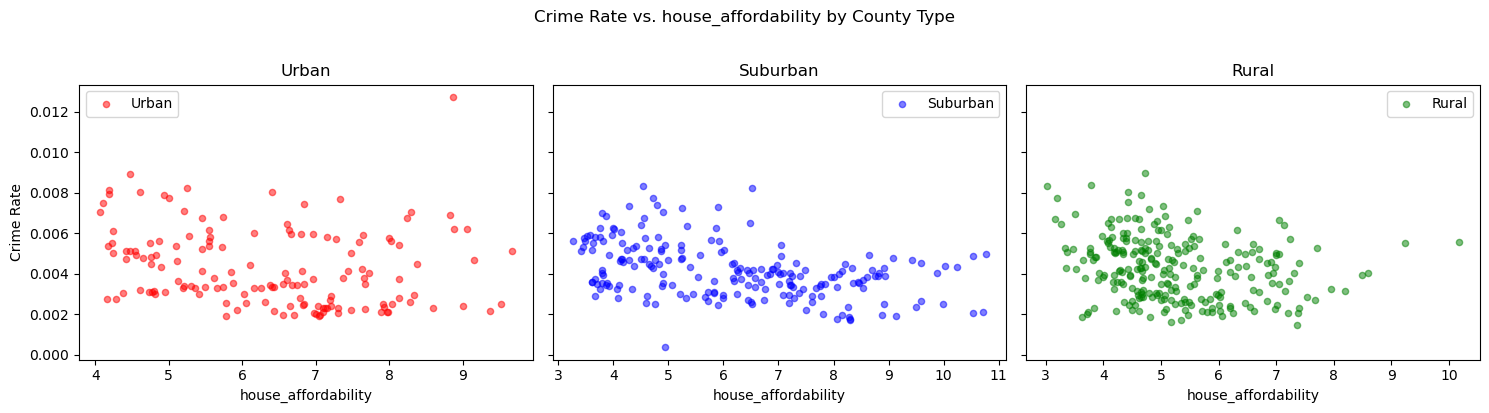

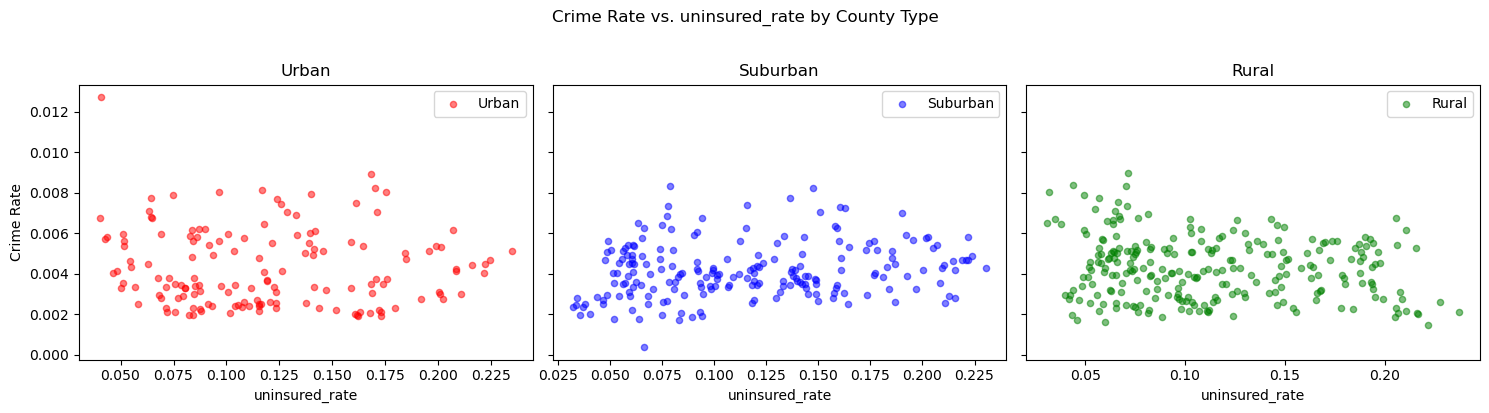

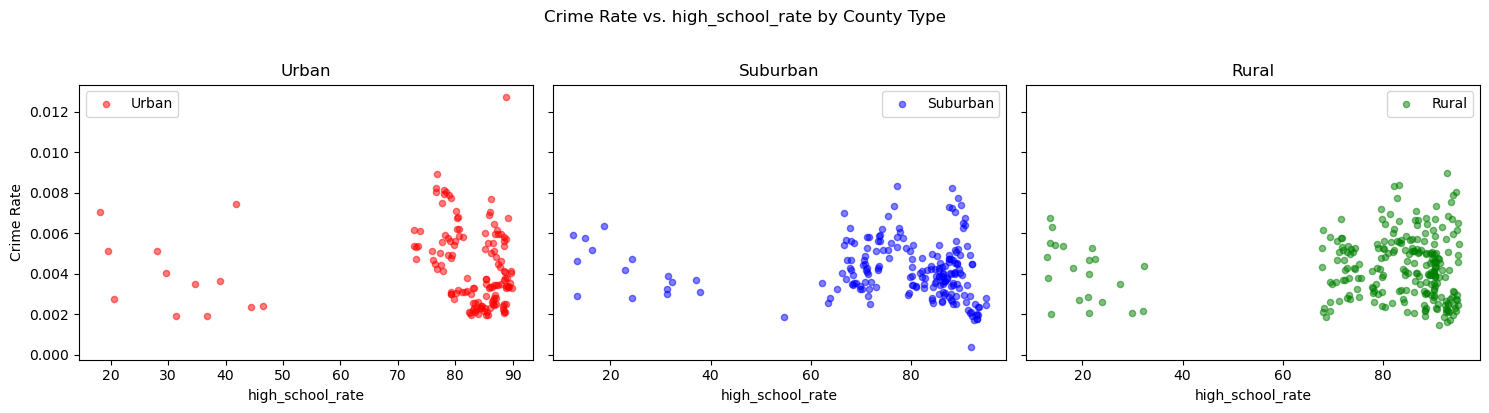

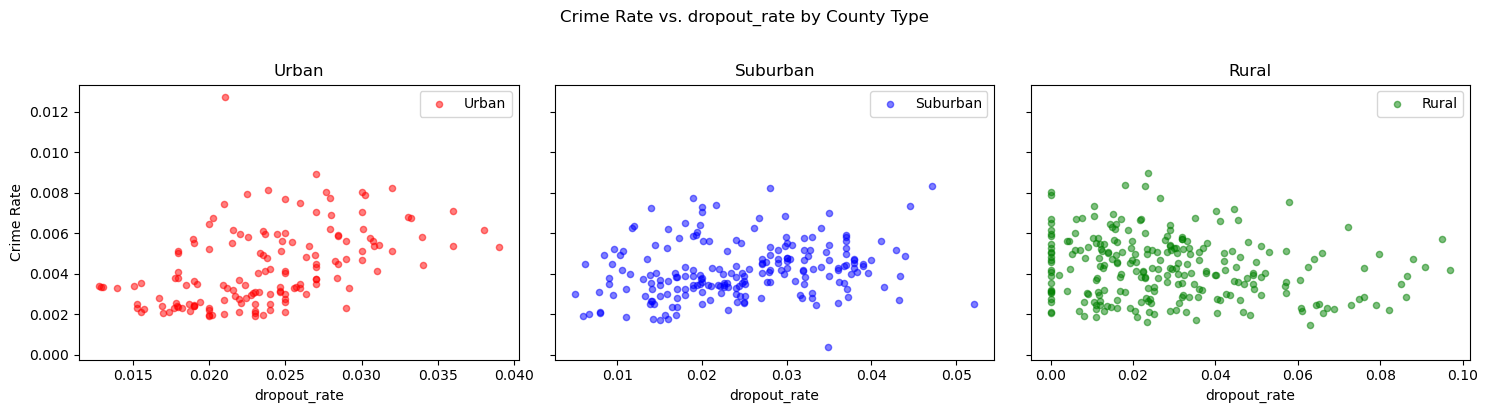

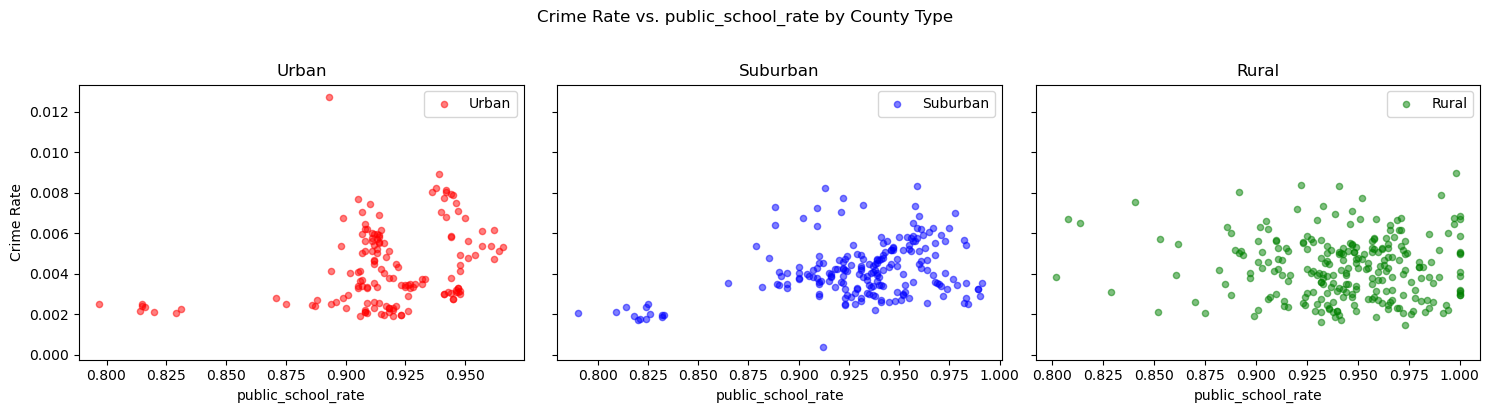

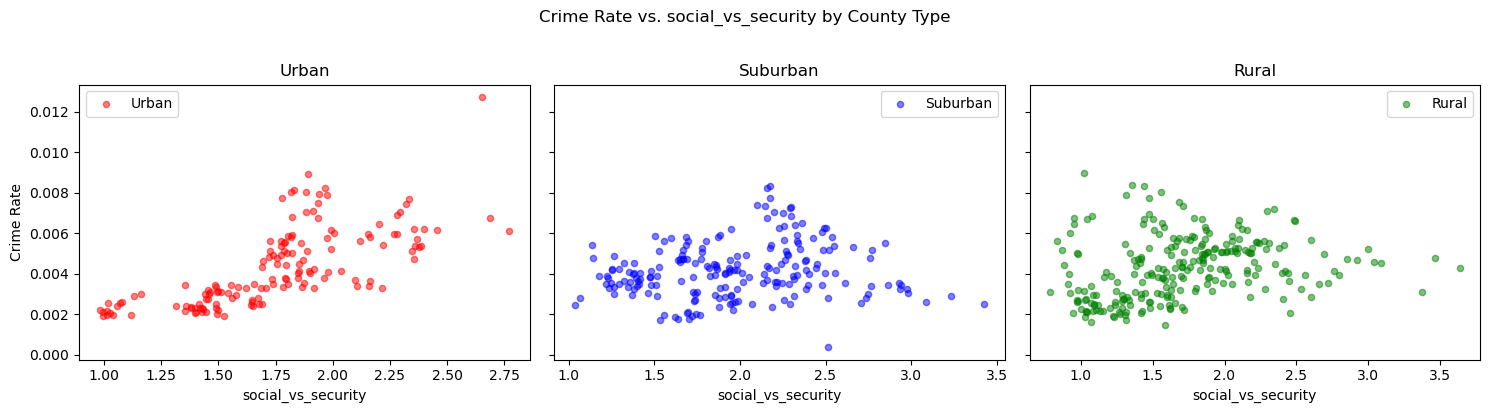

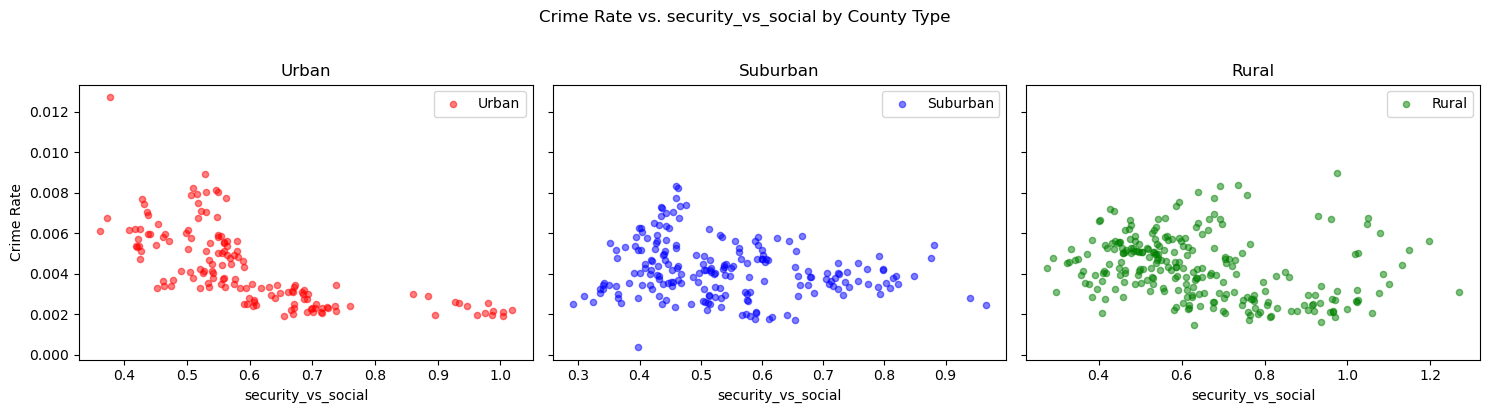

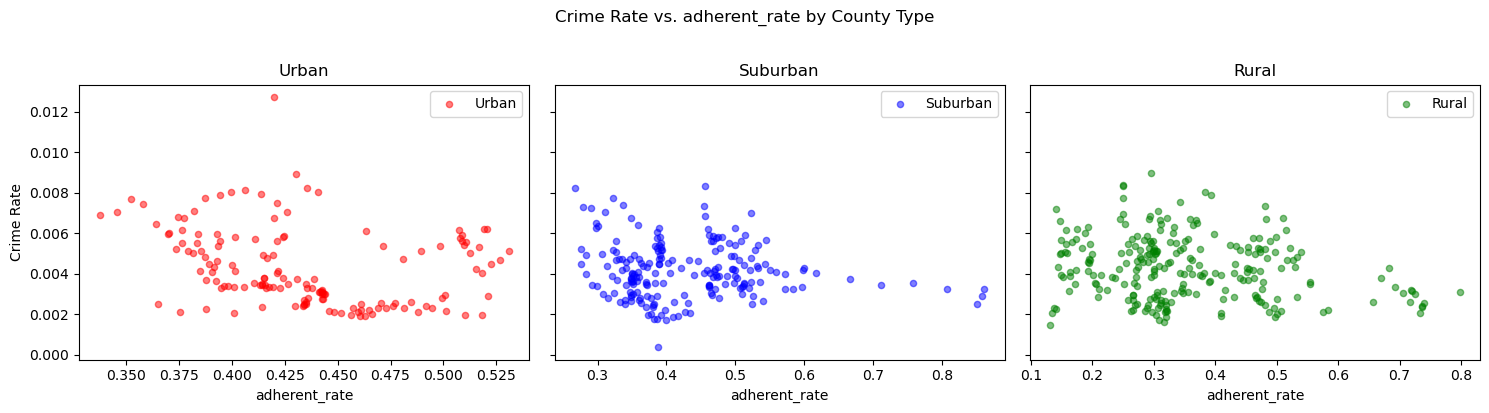

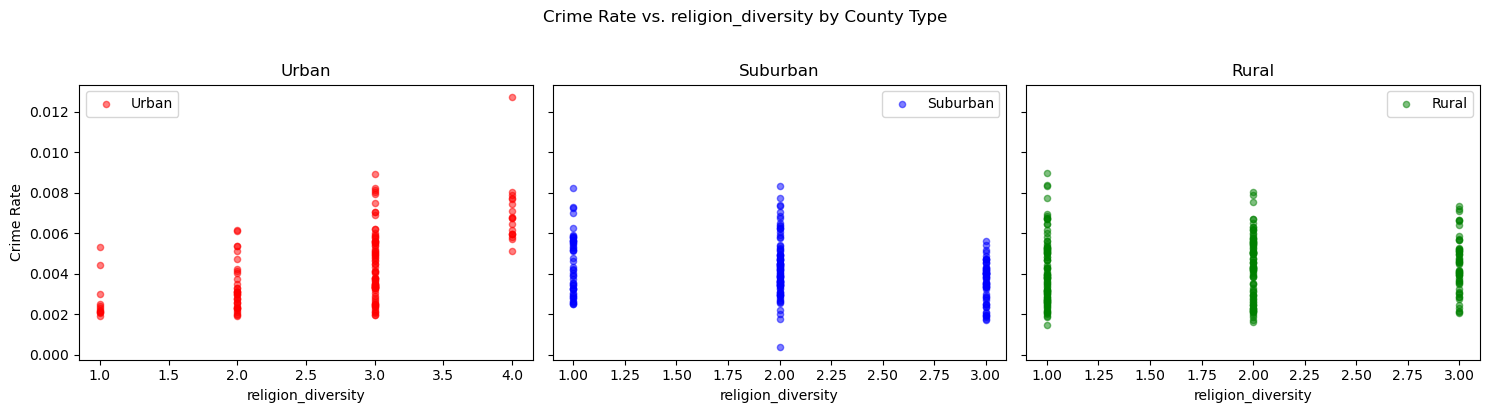

In [11]:
feature_cols = feature_0

categories = {
    'Urban':     ('Category_Urban',   'red'),
    'Suburban':  ('Category_Suburban','blue'),
    'Rural':     ('Category_Rural',   'green')
}

for feat in feature_cols:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    for ax, (label, (cat_col, color)) in zip(axes, categories.items()):
        sub = crime_df[crime_df[cat_col] == 1]
        x = sub[feat]
        y = sub['crime_rate']
        
        ax.scatter(x, y,
                   s=20,             # marker size
                   alpha=0.5,        # semi‐transparent
                   color=color,
                   label=label)
        
        ax.set_title(label)
        ax.set_xlabel(feat)
        if ax is axes[0]:
            ax.set_ylabel('Crime Rate')
        ax.legend()
    
    fig.suptitle(f'Crime Rate vs. {feat} by County Type', y=1.02)
    plt.tight_layout()
    plt.show()


# How features and crime rate change wrt time

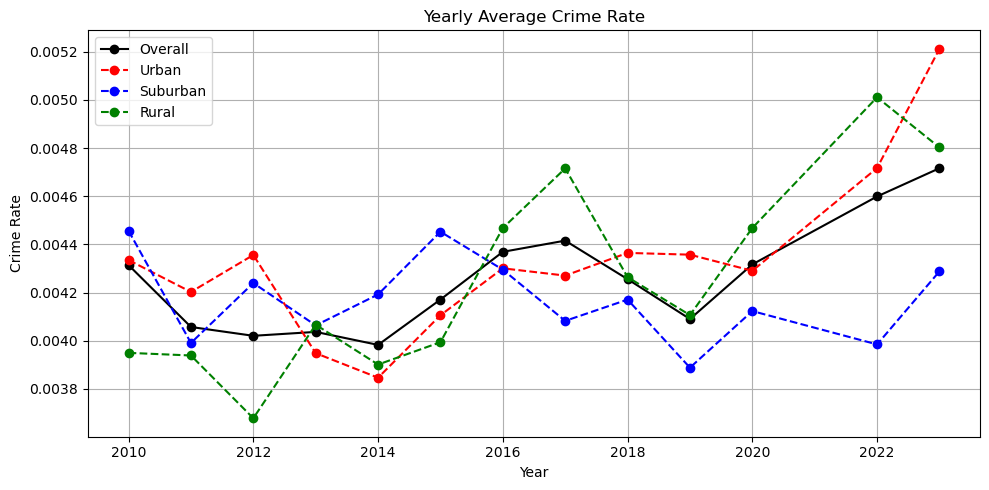

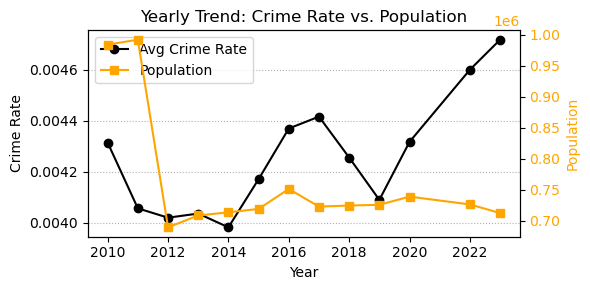

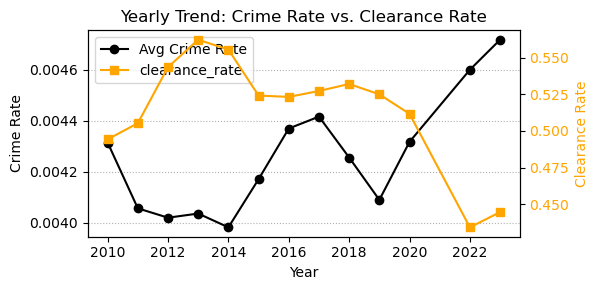

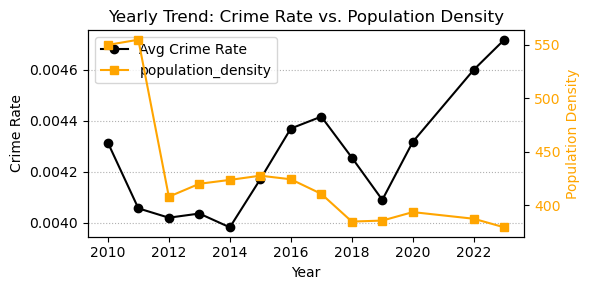

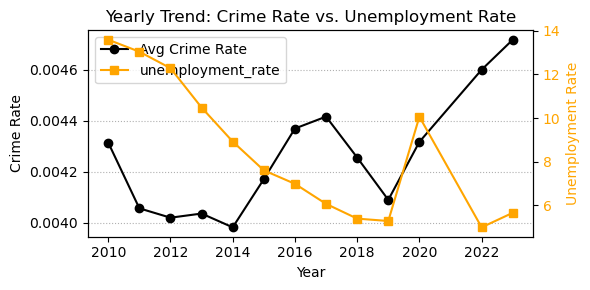

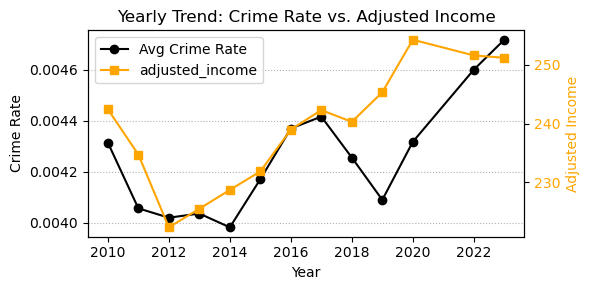

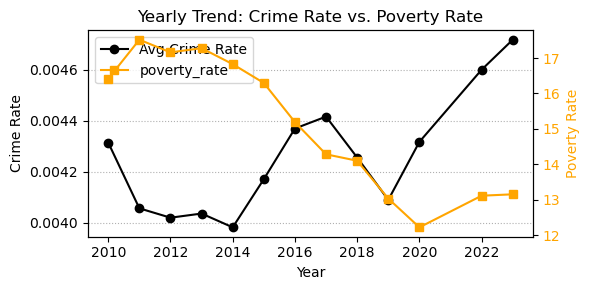

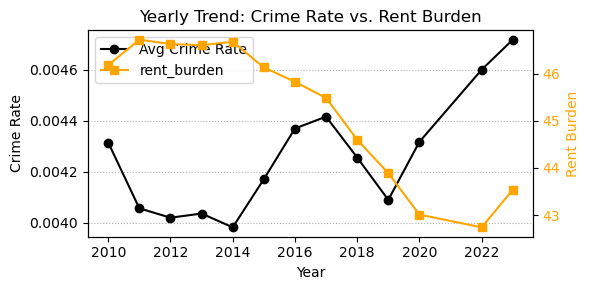

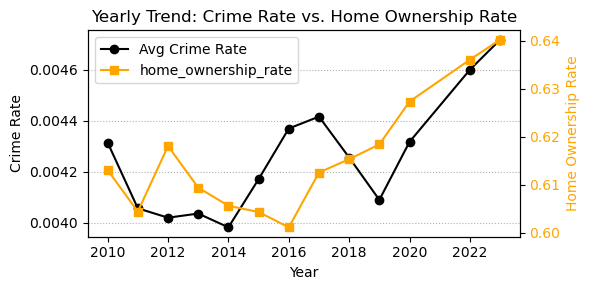

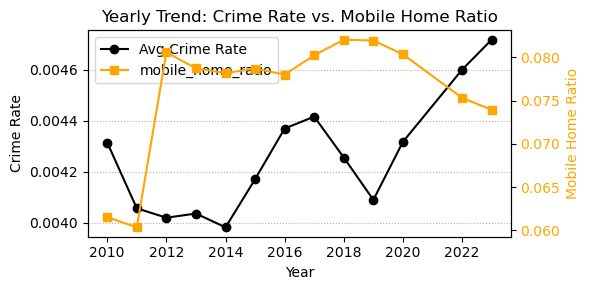

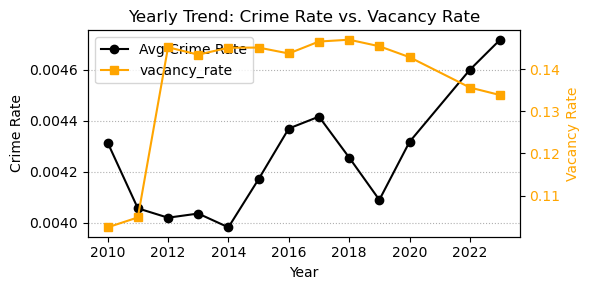

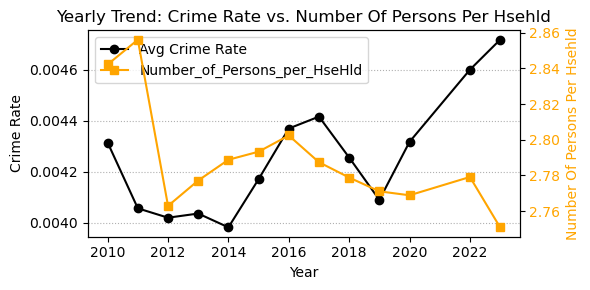

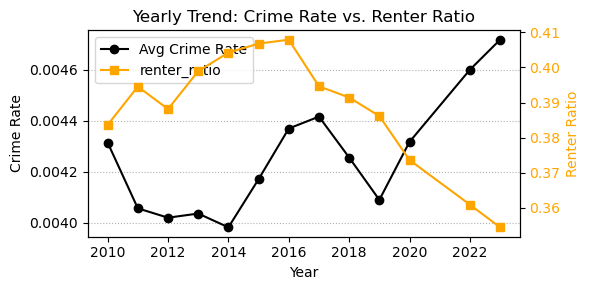

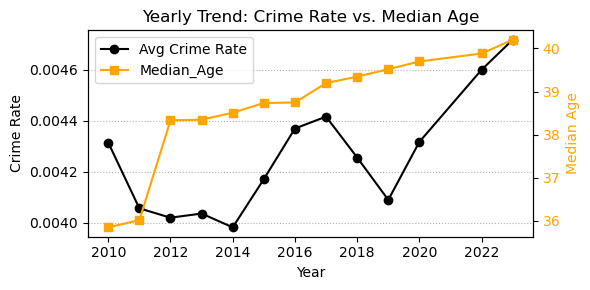

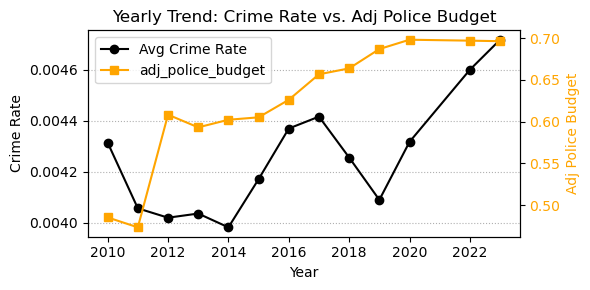

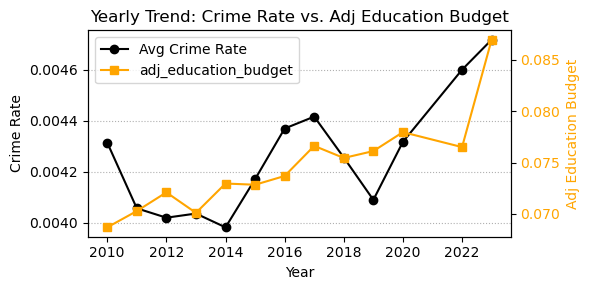

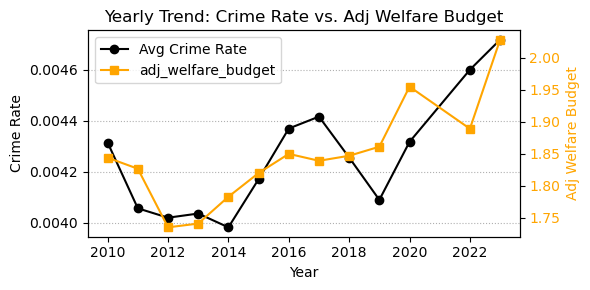

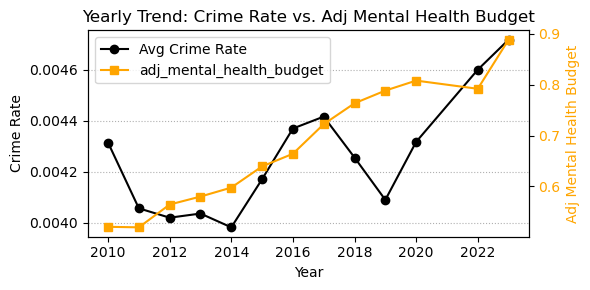

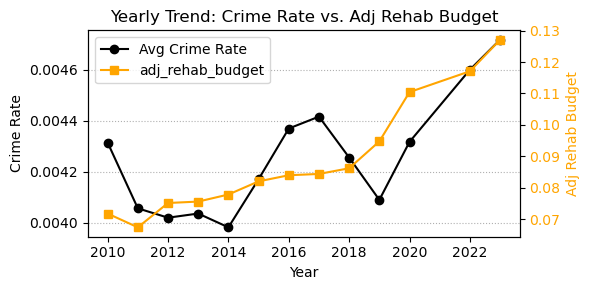

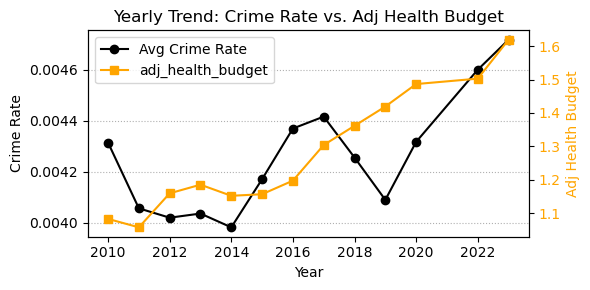

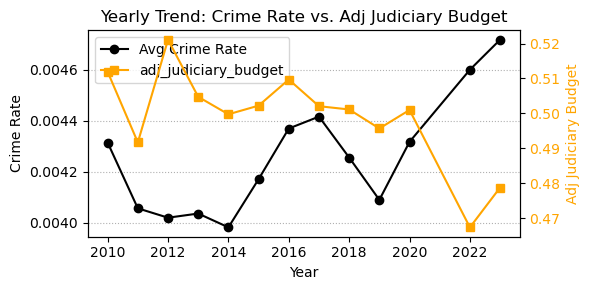

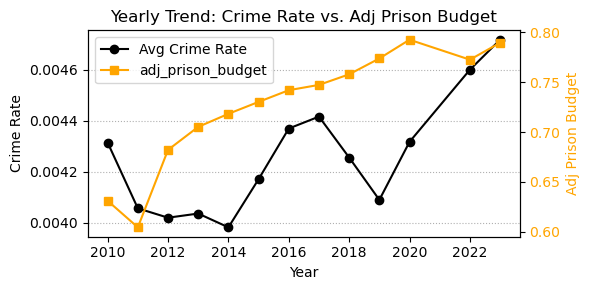

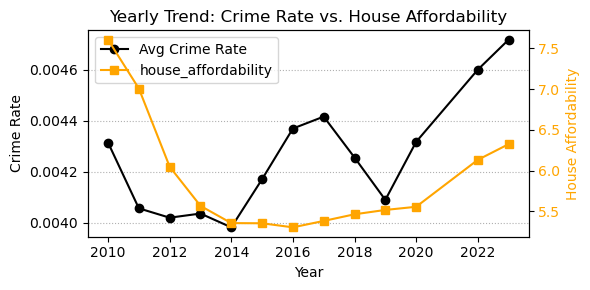

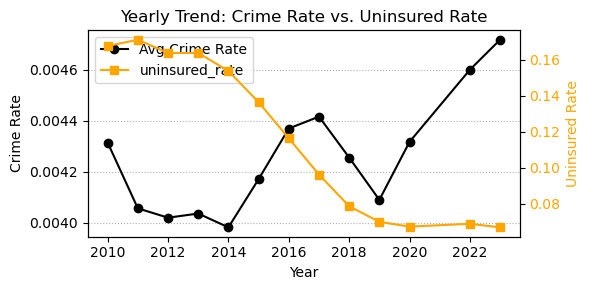

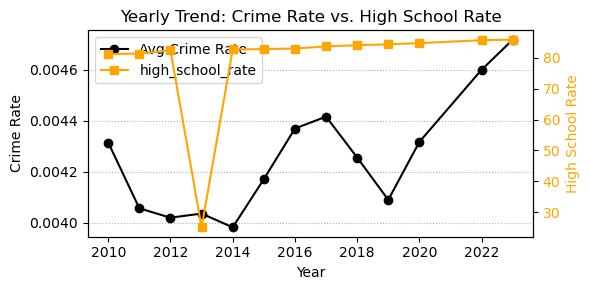

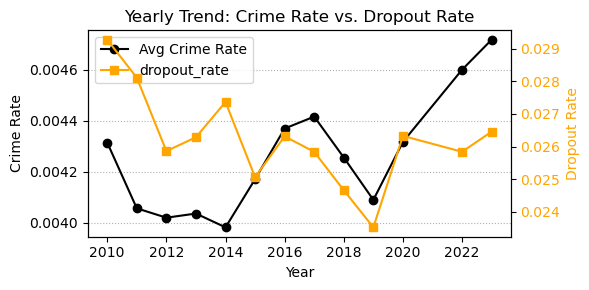

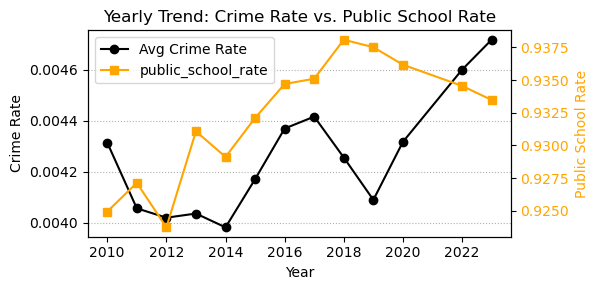

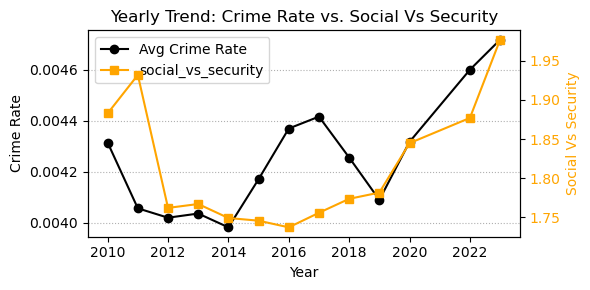

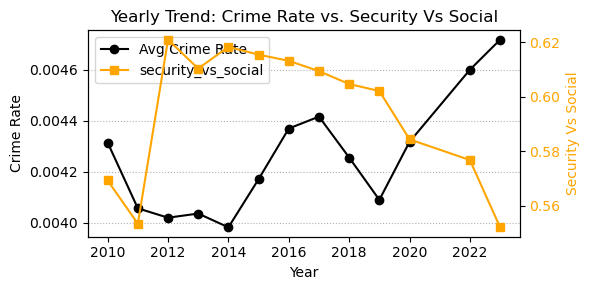

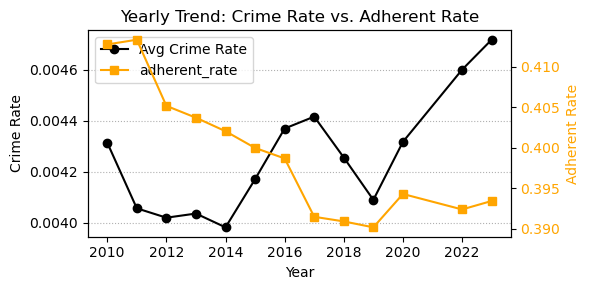

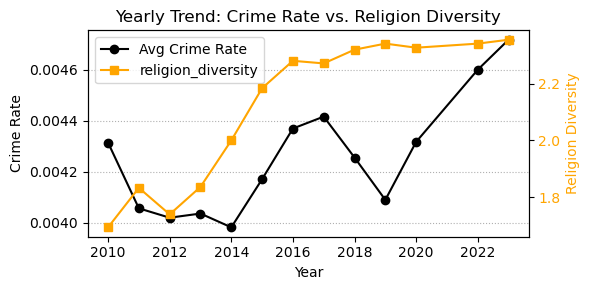

In [12]:
df = crime_df.reset_index()
df['Year'] = df['Year'].astype(int)
df['County_Type'] = np.select(
    [
        df['Category_Urban']   == 1,
        df['Category_Suburban']== 1,
        df['Category_Rural']   == 1
    ],
    ['Urban', 'Suburban', 'Rural'],
    default='All'
)

yearly_overall = df.groupby('Year')['crime_rate'].mean()
yearly_by_cat = df.groupby(['Year','County_Type'])['crime_rate'].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(yearly_overall.index, yearly_overall.values,
         marker='o', linestyle='-', color='black', label='Overall')
for cat, color in zip(['Urban','Suburban','Rural'], ['red','blue','green']):
    plt.plot(yearly_by_cat.index, yearly_by_cat[cat],
             marker='o', linestyle='--', color=color, label=cat)
plt.title('Yearly Average Crime Rate')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


features_to_plot = feature_0
for feat in features_to_plot:
    feat_yearly = df.groupby('Year')[feat].mean()
    crime_yearly = yearly_overall 

    fig, ax1 = plt.subplots(figsize=(6, 3))
    ax1.plot(crime_yearly.index, crime_yearly.values,
             color='black', marker='o', label='Avg Crime Rate')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Crime Rate', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, which='both', axis='y', linestyle=':')

    ax2 = ax1.twinx()
    ax2.plot(feat_yearly.index, feat_yearly.values,
             color='orange', marker='s', label=feat)
    ax2.set_ylabel(feat.replace('_',' ').title(), color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title(f'Yearly Trend: Crime Rate vs. {feat.replace("_"," ").title()}')
    plt.tight_layout()
    plt.show()


# Geospatial plots

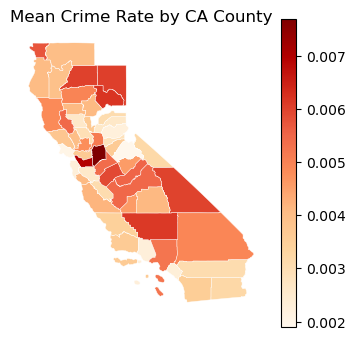

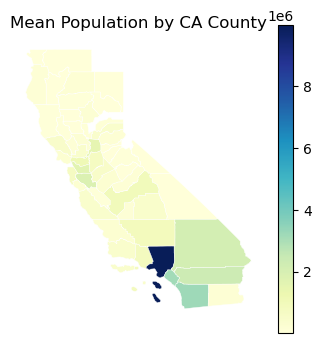

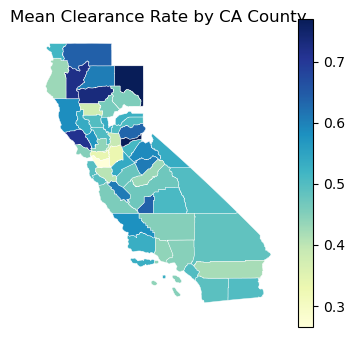

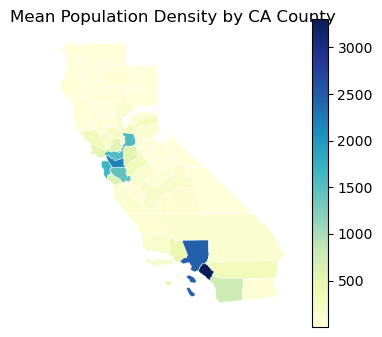

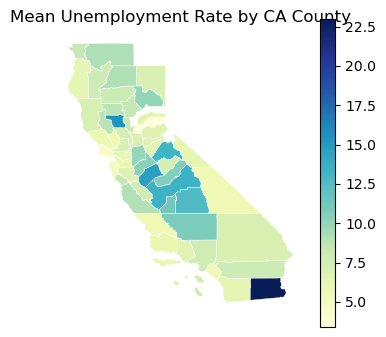

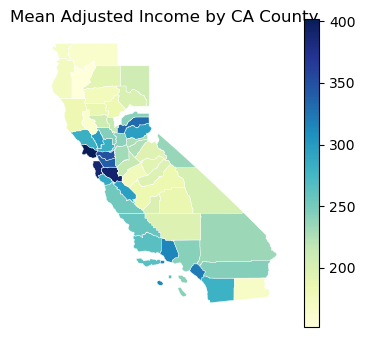

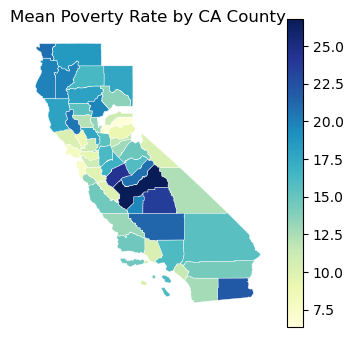

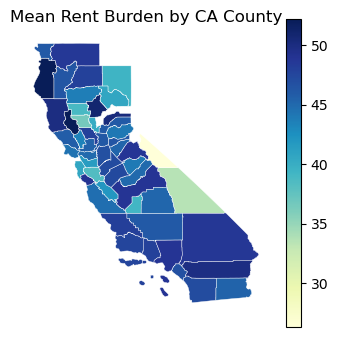

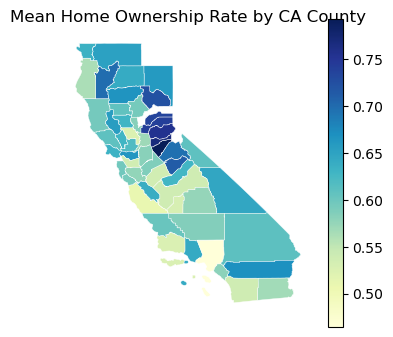

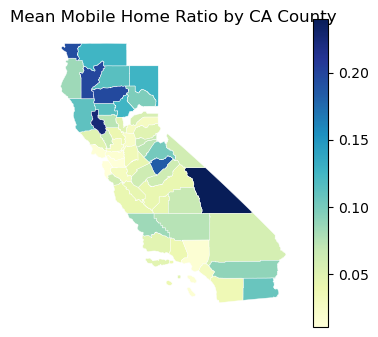

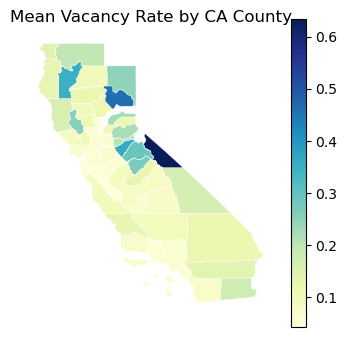

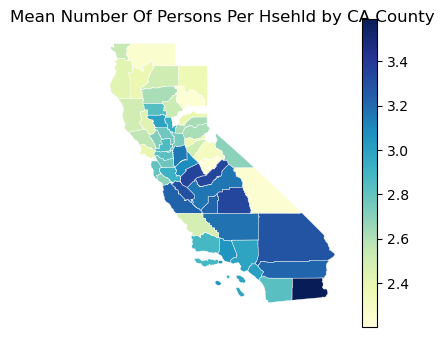

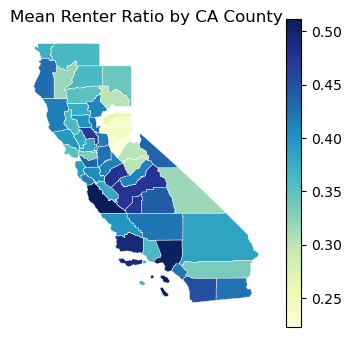

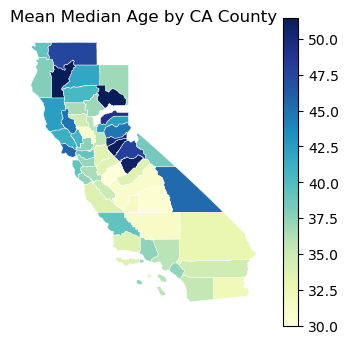

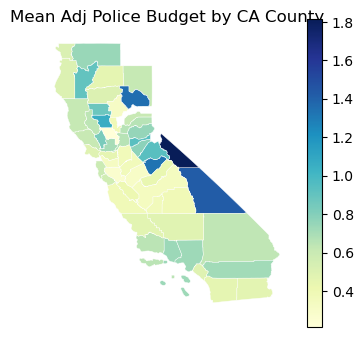

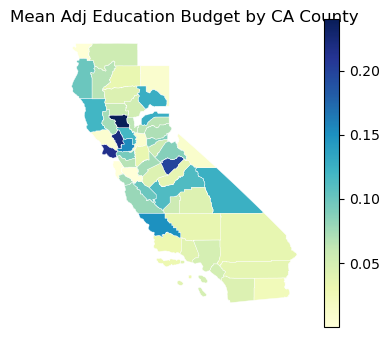

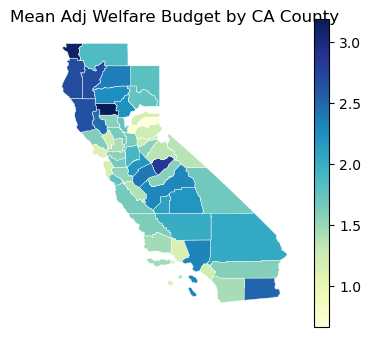

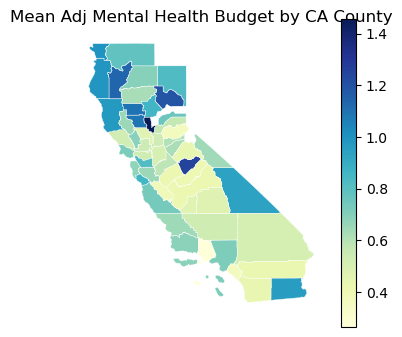

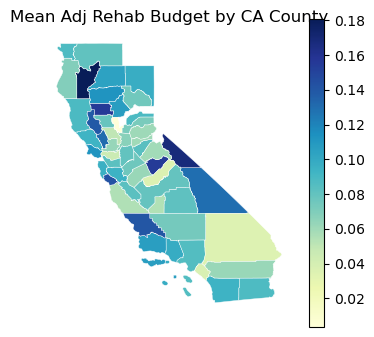

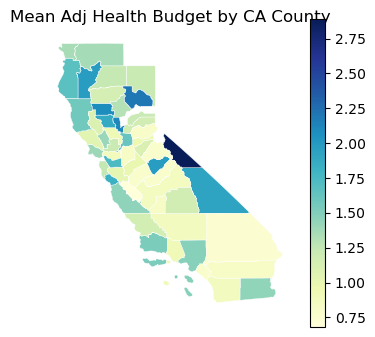

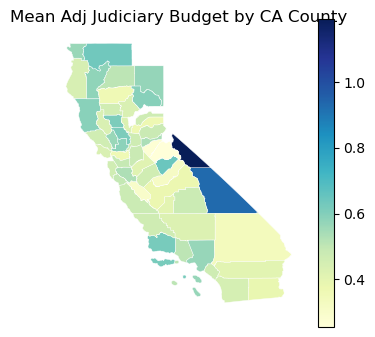

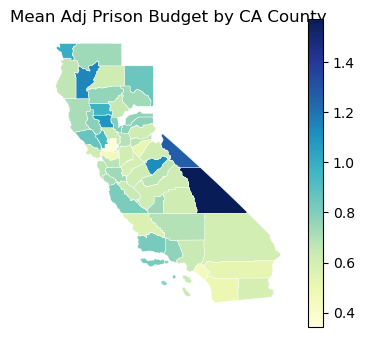

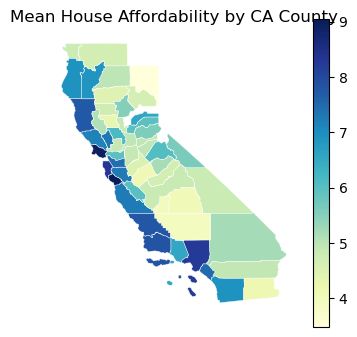

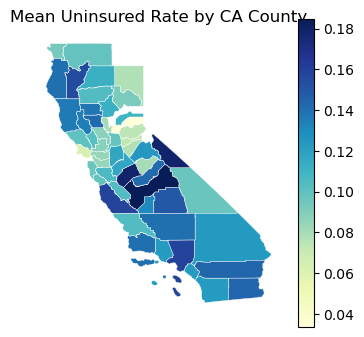

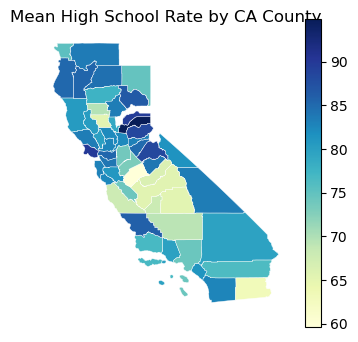

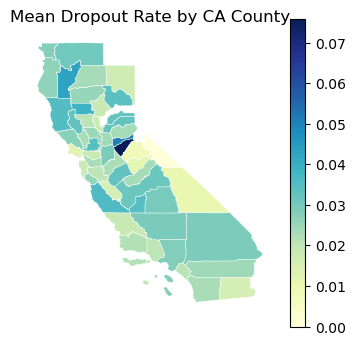

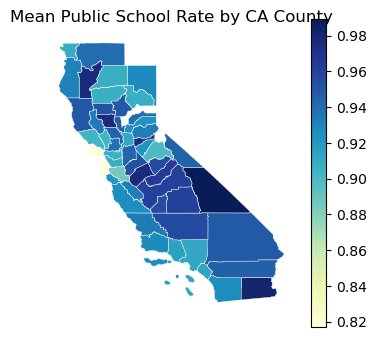

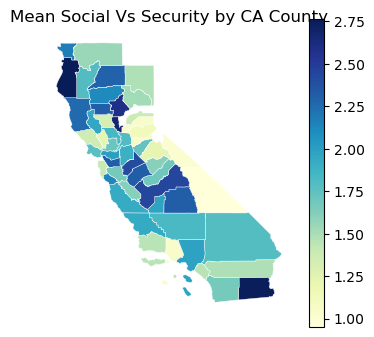

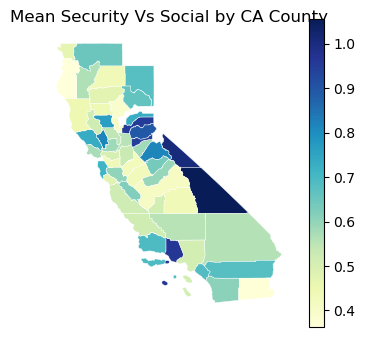

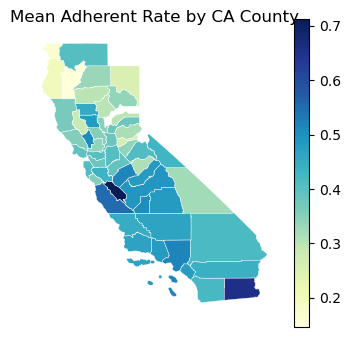

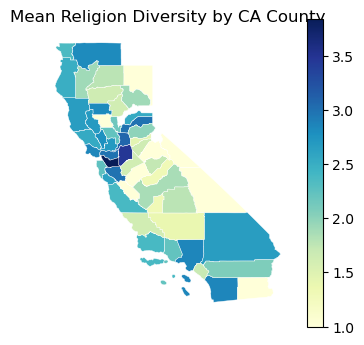

In [13]:
url = (
    "https://www2.census.gov/geo/tiger/TIGER2022/COUNTY/"
    "tl_2022_us_county.zip"
)
r = requests.get(url)
r.raise_for_status()

zip_path = "tl_2022_us_county.zip"
with open(zip_path, "wb") as f:
    f.write(r.content)

extract_dir = "tl_2022_us_county"
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

shp_path = os.path.join(extract_dir, "tl_2022_us_county.shp")
gdf_all = gpd.read_file(shp_path)
gdf_ca_base = gdf_all[gdf_all["STATEFP"] == "06"].copy()
gdf_ca_base = gdf_ca_base.rename(columns={"NAME": "County"})


df = crime_df.reset_index()

all_features = ["crime_rate"] + feature_0

for feature in all_features:
    mean_feat = (
        df.groupby("County")[feature]
          .mean()
          .rename(f"mean_{feature}")
          .reset_index()
    )
    gdf = gdf_ca_base.merge(mean_feat, on="County", how="left")
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    gdf.plot(
        column=f"mean_{feature}",
        cmap="OrRd" if feature=="crime_rate" else "YlGnBu",
        linewidth=0.3,
        edgecolor="white",
        legend=True,
        ax=ax
    )
    ax.set_title(f"Mean {feature.replace('_',' ').title()} by CA County")
    ax.axis("off")
    plt.show()


# PCA plots

How each PCA component contributes to the variance

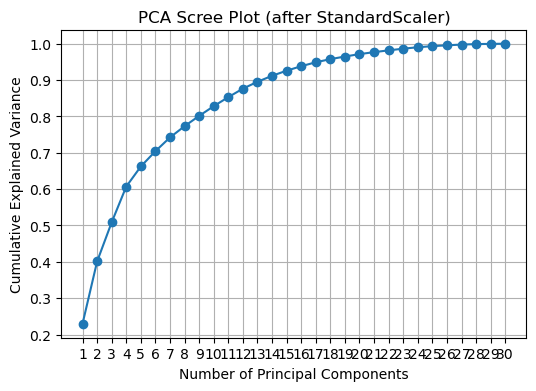

In [14]:
feature_cols = feature_0
X = crime_df[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

county_type = (
    crime_df[['Category_Urban','Category_Suburban','Category_Rural']]
    .idxmax(axis=1)
    .map({'Category_Urban':'Urban',
          'Category_Suburban':'Suburban',
          'Category_Rural':'Rural'})
)

pca = PCA()
pca.fit(X_scaled)
cumratios = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cumratios)+1), cumratios, marker='o')
plt.xticks(np.arange(1, len(cumratios)+1))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot (after StandardScaler)")
plt.grid(True)
plt.show()

The next plot looks at the first two PCA components. We can see that Urban, Suburban and Rural counties are quite different from each other.

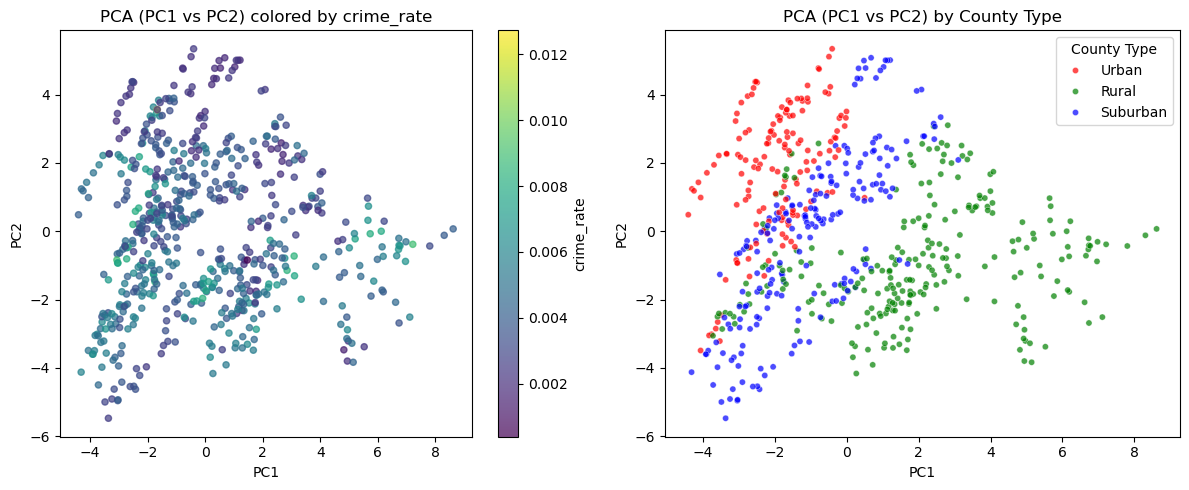

In [15]:
pca2 = PCA(n_components=2)
pc2 = pca2.fit_transform(X_scaled)
df_pc2 = pd.DataFrame(pc2, columns=['PC1','PC2'], index=crime_df.index)

fig, axes = plt.subplots(1,2, figsize=(12,5))
sc = axes[0].scatter(df_pc2['PC1'], df_pc2['PC2'],
                     c=crime_df['crime_rate'], cmap='viridis', s=20, alpha=0.7)
axes[0].set_title('PCA (PC1 vs PC2) colored by crime_rate')
axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')
plt.colorbar(sc, ax=axes[0], label='crime_rate')

sns.scatterplot(x='PC1', y='PC2', hue=county_type, 
                palette={'Urban':'red','Suburban':'blue','Rural':'green'},
                data=df_pc2, ax=axes[1], s=20, alpha=0.7)
axes[1].set_title('PCA (PC1 vs PC2) by County Type')
axes[1].legend(title='County Type')
plt.tight_layout()
plt.show()

t-SNE is a non linear embedding, it also shows that Urban, Suburban and Rural counties are distinct from one another

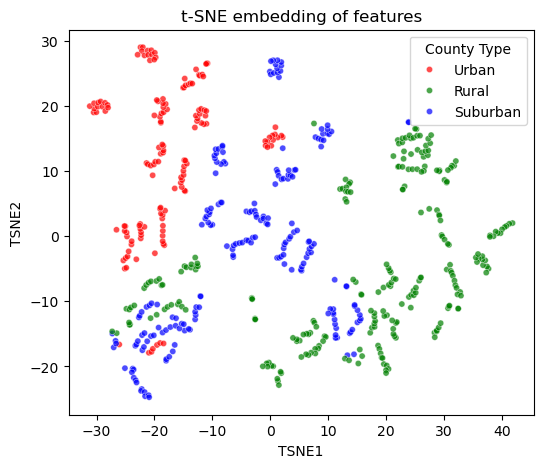

In [16]:
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
tsne_emb = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(tsne_emb, columns=['TSNE1','TSNE2'], index=crime_df.index)

plt.figure(figsize=(6,5))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=county_type,
                palette={'Urban':'red','Suburban':'blue','Rural':'green'},
                data=df_tsne, s=20, alpha=0.7)
plt.title('t‑SNE embedding of features')
plt.xlabel('TSNE1'); plt.ylabel('TSNE2')
plt.legend(title='County Type')
plt.show()